In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 读取数据 read data


df = pd.read_csv("FH_mutations_6.csv", sep=",")
# Split the HGVSc_VEP column into multiple rows (keeping other columns unchanged)拆分HGVSc_VEP列为多行（其他列保持原值）
df["HGVSc_VEP"] = df["HGVSc_VEP"].str.split(";")
df = df.explode("HGVSc_VEP")

# 转换数值型字段Convert numerical fields
numeric_cols = ["REVEL_score", "BayesDel_noAF_score", "BayesDel_addAF_score"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# 清洗缺失值Clean missing values
df_clean = df.dropna(subset=numeric_cols)
print(f"有效数据量effective data: {len(df_clean)} line行")

有效数据量effective data: 3350 line行


In [3]:
import pandas as pd

# 读取CSV文件（如果文件不在当前目录需要指定完整路径）
df = pd.read_csv("FH_mutations_6.csv", encoding='utf-8')  # 如果编码错误可尝试 encoding='latin-1'

# 检查列是否存在
if 'clinvar_clnsig' in df.columns:
    # 统计各值出现次数（包含缺失值）
    clinvar_counts = df['clinvar_clnsig'].value_counts(dropna=False)
    
    # 转换为百分比
    clinvar_percent = df['clinvar_clnsig'].value_counts(dropna=False, normalize=True).mul(100).round(2)
    
    # 合并统计结果
    stats_df = pd.DataFrame({
        'Count': clinvar_counts,
        'Percentage (%)': clinvar_percent
    })
    
    # 显示完整结果（不截断）
    pd.set_option('display.max_rows', None)
    print("==============================")
    print("ClinVar临床意义分类统计结果")
    print("==============================")
    print(stats_df)
    pd.reset_option('display.max_rows')
    
    # 可选：保存统计结果
    # stats_df.to_csv("clinvar_clnsig_stats.csv")
    
else:
    print("错误：数据中不存在'clinvar_clnsig'列")

ClinVar临床意义分类统计结果
                                              Count  Percentage (%)
clinvar_clnsig                                                     
NaN                                            2112           69.29
Uncertain_significance                          676           22.18
Conflicting_classifications_of_pathogenicity     98            3.22
Likely_pathogenic                                74            2.43
Pathogenic/Likely_pathogenic                     45            1.48
Pathogenic                                       26            0.85
Uncertain_significance.                           7            0.23
Likely_benign                                     5            0.16
Uncertain_significanceUncertain_significance      2            0.07
Benign/Likely_benign                              2            0.07
not_provided                                      1            0.03


# 什么是Pearson相关系数 / What is the Pearson Correlation Coefficient

**中文说明：**  
Pearson相关系数，也称为皮尔逊积矩相关系数，是衡量两个连续变量之间线性关系强度和方向的一种统计量。其取值范围通常在 $-1$ 到 $+1$ 之间，其中：  
- **$+1$** 表示两个变量之间存在完全正相关，即当一个变量增加时，另一个变量也按固定比例增加。  
- **$-1$** 表示两个变量之间存在完全负相关，即当一个变量增加时，另一个变量按固定比例减少。  
- **$0$** 表示两个变量之间没有线性相关关系。

计算公式为：
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$  
其中 $x_i$ 和 $y_i$ 分别表示两个变量的样本值，$\bar{x}$ 和 $\bar{y}$ 为它们的均值。

---

**English Explanation:**  
The Pearson correlation coefficient, also known as the Pearson product-moment correlation coefficient, is a statistic that measures the strength and direction of the linear relationship between two continuous variables. Its value typically ranges from $-1$ to $+1$, where:  
- **$+1$** indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally.  
- **$-1$** indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.  
- **$0$** indicates no linear correlation between the two variables.

The formula is given by:
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$  
where $x_i$ and $y_i$ represent the sample values of the two variables, and $\bar{x}$ and $\bar{y}$ are their respective means.






# 什么是Spearman秩相关系数 / What is the Spearman Rank Correlation Coefficient

**中文说明：**  
Spearman秩相关系数（Spearman's rank correlation coefficient），通常用 $\rho$ 表示，是一种非参数统计量，用于衡量两个变量之间的单调关系强度。与Pearson相关系数不同，Spearman相关系数基于数据的秩（排名）而非原始数值，因此它不仅适用于线性关系，也适用于任何单调关系。其取值范围为 $-1$ 到 $+1$，其中：  
- **$+1$** 表示完全正单调关系，即当一个变量的秩增加时，另一个变量的秩也完全增加；  
- **$-1$** 表示完全负单调关系，即当一个变量的秩增加时，另一个变量的秩完全下降；  
- **$0$** 表示没有单调关系。|

Spearman秩相关系数的计算步骤一般包括：  
1. 将数据转换为秩。  
2. 计算这些秩之间的Pearson相关系数。  

在没有平级数据（tied ranks）的情况下，其公式可表示为：  
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$  
其中 $d_i$ 是每对观测值秩之间的差异，$n$ 是样本数量。

---

**English Explanation:**  
The Spearman rank correlation coefficient, often denoted by $\rho$, is a nonparametric statistic used to measure the strength and direction of the monotonic relationship between two variables. Unlike the Pearson correlation coefficient, Spearman's coefficient is based on the ranks of the data rather than the raw values, making it suitable for evaluating any monotonic relationship, not just linear ones. Its value ranges from $-1$ to $+1$, where:  
- **$+1$** indicates a perfect positive monotonic relationship, meaning that as one variable's rank increases, the other variable's rank also increases perfectly;  
- **$-1$** indicates a perfect negative monotonic relationship, meaning that as one variable's rank increases, the other variable's rank decreases perfectly;  
- **$0$** indicates no monotonic relationship.

The calculation steps for the Spearman rank correlation coefficient generally include:  
1. Converting the data into ranks.  
2. Computing the Pearson correlation coefficient between these ranks.

When there are no tied ranks, the formula is given by:  
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$  
where $d_i$ is the difference between the ranks of each pair of observations, and $n$ is the sample size.


In [4]:
# 计算Pearson相关系数# Calculate Pearson correlation coefficient
pearson_addAF = stats.pearsonr(df_clean["REVEL_score"], df_clean["BayesDel_addAF_score"])
pearson_noAF = stats.pearsonr(df_clean["REVEL_score"], df_clean["BayesDel_noAF_score"])

# 计算Spearman秩相关系数# Calculate Spearman rank correlation coefficient
spearman_addAF = stats.spearmanr(df_clean["REVEL_score"], df_clean["BayesDel_addAF_score"])
spearman_noAF = stats.spearmanr(df_clean["REVEL_score"], df_clean["BayesDel_noAF_score"])

print(f"""
Pearson相关性:
- BayesDel_addAF_score和REVEL_score相关性: r = {pearson_addAF[0]:.5f}, p = {pearson_addAF[1]:.10e}
- BayesDel_noAF_scoreREVEL_score相关性:  r = {pearson_noAF[0]:.5f}, p = {pearson_noAF[1]:.10e}

Spearman相关性:
- BayesDel_addAF_scoreREVEL_score相关性: ρ = {spearman_addAF[0]:.5f}, p = {spearman_addAF[1]:.10e}
- BayesDel_noAF_scoreREVEL_score相关性:  ρ = {spearman_noAF[0]:.5f}, p = {spearman_noAF[1]:.10e}
""")


Pearson相关性:
- BayesDel_addAF_score和REVEL_score相关性: r = 0.89865, p = 0.0000000000e+00
- BayesDel_noAF_scoreREVEL_score相关性:  r = 0.90579, p = 0.0000000000e+00

Spearman相关性:
- BayesDel_addAF_scoreREVEL_score相关性: ρ = 0.88710, p = 0.0000000000e+00
- BayesDel_noAF_scoreREVEL_score相关性:  ρ = 0.89251, p = 0.0000000000e+00



# 什么是散点图矩阵 (Scatter Plot Matrix)

**中文说明：**  
散点图矩阵，也称为成对散点图或 pairs plot，是一种用于同时展示数据集中多个变量之间两两关系的可视化工具。矩阵中的每个单元格都是一个散点图，用于显示两个变量之间的关系。通常：  
- 对角线上的单元格显示每个变量的分布（例如直方图或核密度估计图）。  
- 非对角线上的单元格显示不同变量之间的散点图，有助于识别变量间的相关性、趋势或异常值。

---

**English Explanation:**  
A scatter plot matrix, also known as a pairs plot, is a visualization tool used to display pairwise relationships among multiple variables in a dataset. Each cell in the matrix is a scatter plot showing the relationship between two variables. Typically:  
- The diagonal cells display the distribution of each variable (such as histograms or kernel density plots).  
- The off-diagonal cells display scatter plots between different variables, which help identify correlations, trends, or outliers.


# 什么是相关性热图 (Correlation Heatmap)

**中文说明：**  
相关性热图是一种图形工具，通过颜色的强度来展示变量之间的相关关系。热图中的每个单元格代表两个变量之间的相关系数，通常使用连续的颜色渐变来表示相关系数的大小，其中颜色越深（或越浅，取决于色标设置）表示相关性越强。这种图形便于快速识别数据集中变量间的关系模式和潜在的共性。

---

**English Explanation:**  
A correlation heatmap is a graphical tool that displays the relationship between variables through the intensity of colors. Each cell in the heatmap represents the correlation coefficient between a pair of variables, usually shown on a continuous color scale where the intensity (darker or lighter, depending on the color scheme) indicates the strength of the correlation. This visualization helps quickly identify patterns and potential associations among variables in a dataset.


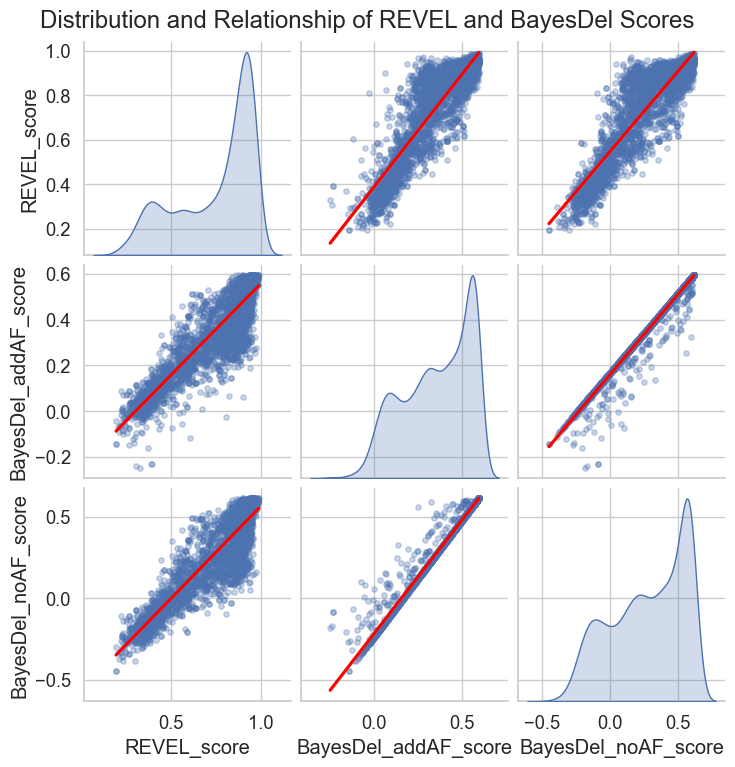

In [5]:
sns.set(style="whitegrid", font_scale=1.2)

# 散点图矩阵Scatter Plot Matrix
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)
g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02) #REVEL与BayesDel评分分布及关系Distribution and Relationship of REVEL and BayesDel Scores
plt.show()



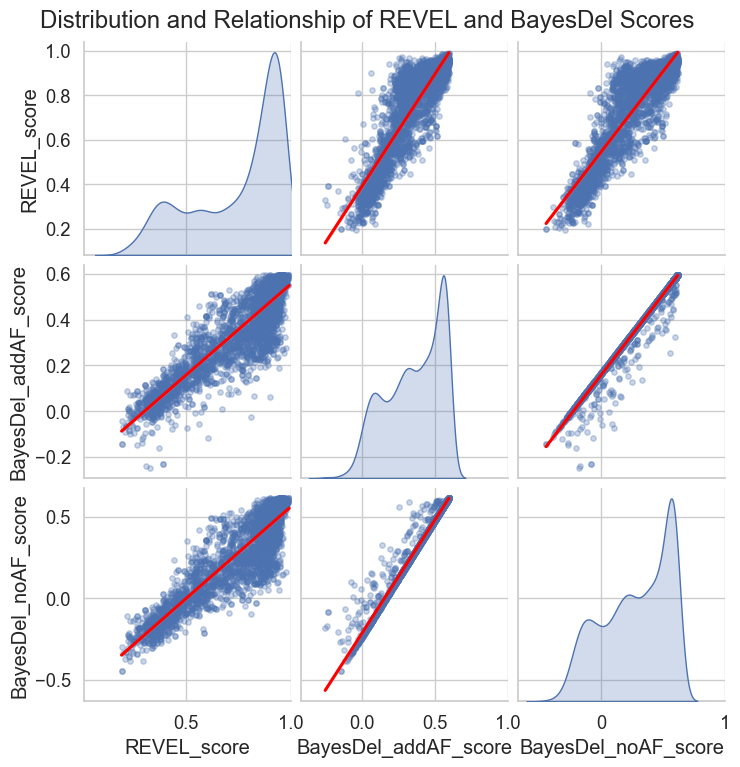

In [6]:
sns.set(style="whitegrid", font_scale=1.2)

# 散点图矩阵Scatter Plot Matrix
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)

# 仅限制x轴最大值（保留最小值自动调整）
for ax in g.diag_axes:
    ax.set_xlim(None, 1)  # 关键修改：upper bound=1

g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02)
plt.savefig("score_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

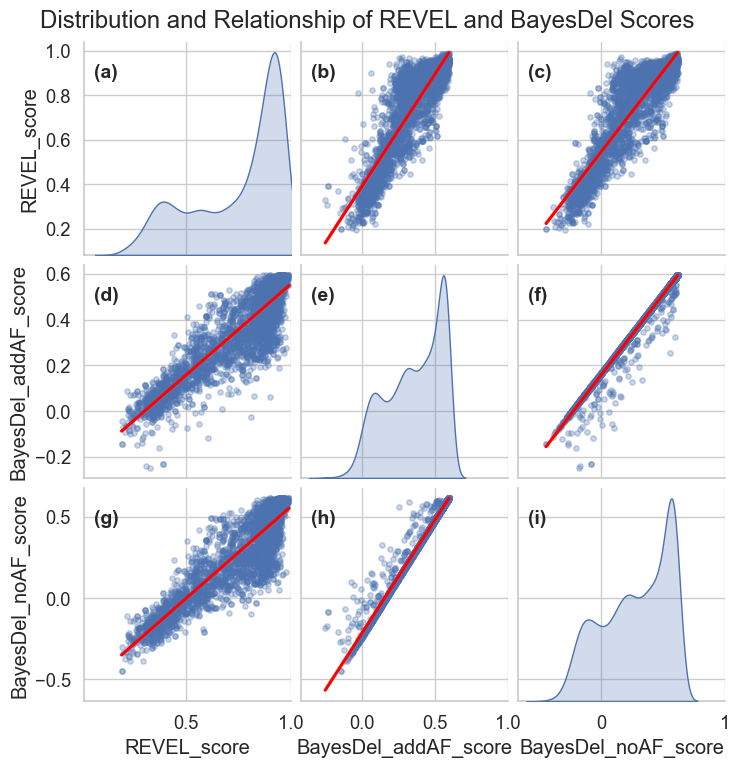

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import string

sns.set(style="whitegrid", font_scale=1.2)

# 生成散点图矩阵
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)

# 添加子图编号
letters = list(string.ascii_lowercase)  # 生成字母列表 (a, b, c, ...)
idx = 0  # 初始化编号索引

# 遍历所有子图坐标系
for i in range(len(g.axes)):
    for j in range(len(g.axes[i])):
        ax = g.axes[i][j]
        
        # 在左上角添加编号 (坐标使用相对位置)
        ax.text(
            x=0.05, 
            y=0.9, 
            s=f"({letters[idx]})", 
            transform=ax.transAxes,
            fontsize=14,
            fontweight='bold',
            va='top'
        )
        idx += 1

# 限制对角线子图的x轴范围
for ax in g.diag_axes:
    ax.set_xlim(None, 1)

# 添加主标题并保存
g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02)
plt.savefig("score_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


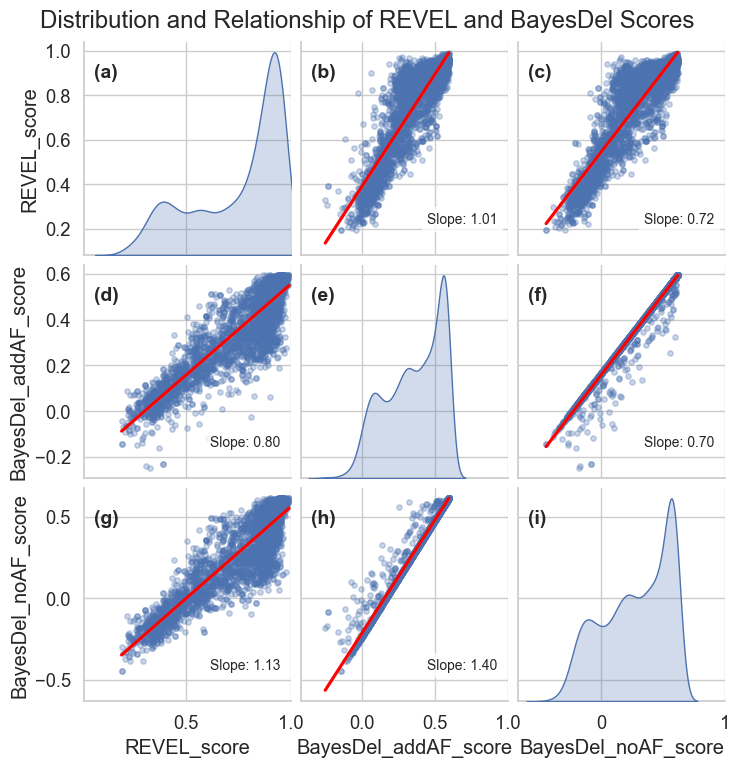

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from scipy import stats  # 新增统计计算库

sns.set(style="whitegrid", font_scale=1.2)

# 生成散点图矩阵
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)

# 添加子图编号和回归斜率
letters = list(string.ascii_lowercase)
idx = 0

# 获取变量列表
variables = g.x_vars  # 与vars参数一致 ["REVEL", "BayesDel_addAF", "BayesDel_noAF"]

for i in range(len(variables)):
    for j in range(len(variables)):
        ax = g.axes[i][j]
        
        # 添加子图编号
        ax.text(0.05, 0.9, f"({letters[idx]})", 
                transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
        
        # 跳过对角线子图（KDE图无回归线）
        if i != j:
            # 获取当前子图的x,y数据
            x_var = variables[j]
            y_var = variables[i]
            x_data = df_clean[x_var]
            y_data = df_clean[y_var]
            
            # 过滤缺失值
            mask = ~np.isnan(x_data) & ~np.isnan(y_data)
            x_clean = x_data[mask]
            y_clean = y_data[mask]
            
            # 计算线性回归
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
            
            # 添加斜率标注
            ax.text(
                0.95, 0.15,  # 右下角位置
                f"Slope: {slope:.2f}",
                transform=ax.transAxes,
                ha='right',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
            )
        
        idx += 1

# 限制对角线子图范围
for ax in g.diag_axes:
    ax.set_xlim(None, 1)

# 主标题和保存
g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02)
plt.savefig("score_matrix_with_slopes.png", dpi=300, bbox_inches="tight")
plt.show()

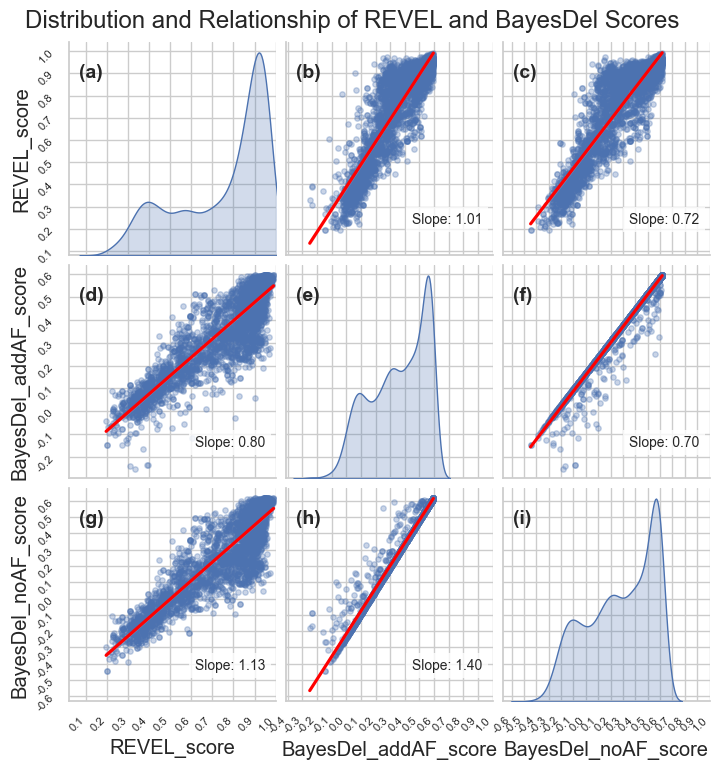

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from scipy import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  # 新增刻度控制模块

sns.set(style="whitegrid", font_scale=1.2)

# 生成散点图矩阵
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)

# 添加子图编号和回归斜率
letters = list(string.ascii_lowercase)
idx = 0

# 获取变量列表
variables = g.x_vars

for i in range(len(variables)):
    for j in range(len(variables)):
        ax = g.axes[i][j]
        
        # 添加子图编号
        ax.text(0.05, 0.9, f"({letters[idx]})", 
                transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
        
        # ========== 新增部分：设置刻度 ==========
        # 设置x/y轴主刻度为0.1间隔
        ax.xaxis.set_major_locator(MultipleLocator(0.1))
        ax.yaxis.set_major_locator(MultipleLocator(0.1))
        
        # 格式化刻度标签（保留1位小数）
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        # 优化标签显示（旋转45度防止重叠）
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
        plt.setp(ax.get_yticklabels(), rotation=45, ha='right', fontsize=8)
        # ========== 新增部分结束 ==========
        
        # 跳过对角线子图（KDE图无回归线）
        if i != j:
            x_var = variables[j]
            y_var = variables[i]
            x_data = df_clean[x_var]
            y_data = df_clean[y_var]
            
            # 过滤缺失值
            mask = ~np.isnan(x_data) & ~np.isnan(y_data)
            x_clean = x_data[mask]
            y_clean = y_data[mask]
            
            # 计算线性回归
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
            
            # 添加斜率标注
            ax.text(
                0.95, 0.15,
                f"Slope: {slope:.2f}",
                transform=ax.transAxes,
                ha='right',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
            )
        
        idx += 1

# 限制对角线子图范围
for ax in g.diag_axes:
    ax.set_xlim(None, 1)

# 主标题和保存
g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02)
plt.savefig("score_matrix_with_ticks_2.png", dpi=300, bbox_inches="tight")
plt.show()


In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np

# 假设 scores 是评分数据
scores = df_clean[["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"]].values
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(scores)
print("均值:", gmm.means_)
print("方差:", gmm.covariances_)

均值: [[0.660586   0.26610387 0.14446349]
 [0.93043396 0.55327997 0.55697282]
 [0.68744495 0.21891545 0.2114074 ]]
方差: [[[0.04285168 0.02743621 0.03941024]
  [0.02743621 0.02357904 0.03386827]
  [0.03941024 0.03386827 0.04865048]]

 [[0.00109078 0.00063938 0.00091835]
  [0.00063938 0.00113814 0.0016334 ]
  [0.00091835 0.0016334  0.00234725]]

 [[0.0484699  0.03856927 0.05258132]
  [0.03856927 0.04317684 0.05247693]
  [0.05258132 0.05247693 0.07181515]]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\1500274959.py:55: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout(pad=3)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\1500274959.py:55: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(pad=3)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\1500274959.py:55: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout(pad=3)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\1500274959.py:56: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig("enhanced_distribution_analysis.png",
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\1500274959.py:56: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig("enhanced_distribution_analysis.png",
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\1500274959.py:56: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing 

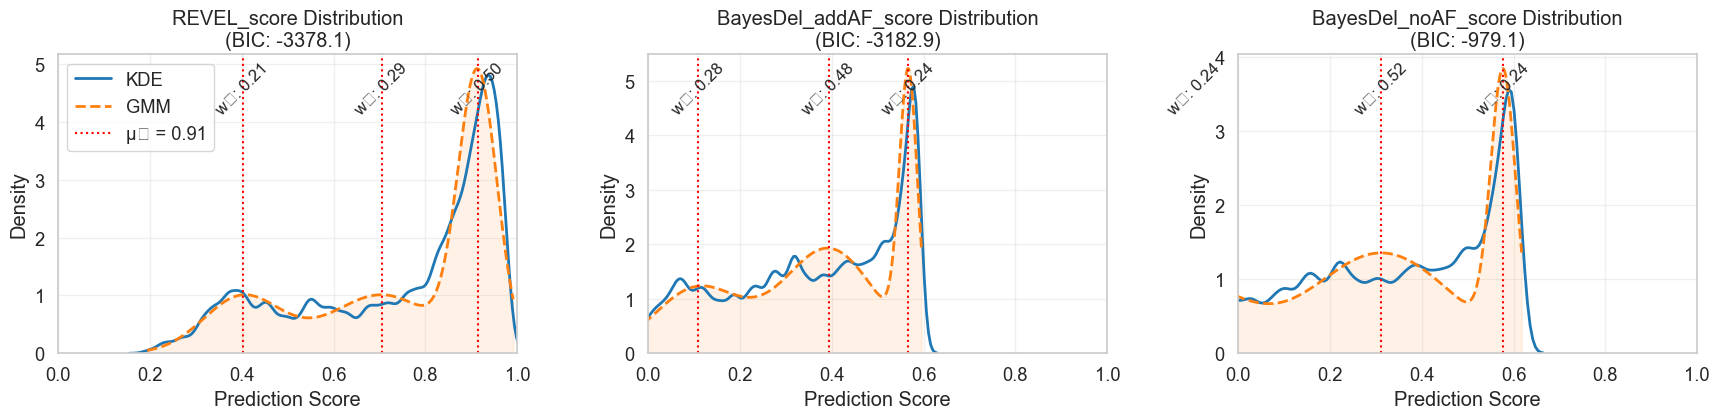

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture

plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

def plot_enhanced_distributions(df, scores, n_components=3):
    """可视化多峰分布并标注GMM拟合结果"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 颜色配置
    kde_color = '#1f77b4'
    gmm_color = '#ff7f0e'
    
    for idx, score in enumerate(scores):
        ax = axes[idx]
        data = df[score].dropna().values.reshape(-1, 1)
        
        # 核密度估计
        sns.kdeplot(data=df[score], ax=ax, color=kde_color, 
                   linewidth=2, label='KDE', bw_adjust=0.3)
        
        # GMM拟合
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(data)
        x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
        logprob = gmm.score_samples(x)
        pdf = np.exp(logprob)
        
        # 绘制GMM分量
        ax.plot(x, pdf, '--', color=gmm_color, linewidth=2, label='GMM')
        ax.fill_between(x.flatten(), pdf, alpha=0.1, color=gmm_color)
        
        # 标注各高斯分量均值和权重
        for k in range(n_components):
            mu = gmm.means_[k][0]
            weight = gmm.weights_[k]
            ax.axvline(mu, color='red', linestyle=':', linewidth=1.5,
                       label=f'μ{chr(8321 + k)} = {mu:.2f}' if k==0 else None)
            ax.text(mu, 0.8*ax.get_ylim()[1], 
                    f'w{chr(8321 + k)}: {weight:.2f}',
                    ha='center', rotation=45)
            
        # 格式设置
        ax.set_title(f"{score} Distribution\n(BIC: {gmm.bic(data):.1f})")
        ax.set_xlabel("Prediction Score")
        ax.set_ylabel("Density")
        ax.set_xlim(0, 1)
        ax.grid(True, alpha=0.3)
        
        if idx == 0:
            ax.legend(loc='upper left')
    
    plt.tight_layout(pad=3)
    plt.savefig("enhanced_distribution_analysis.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

# 执行可视化
if all(col in df_clean.columns for col in ["REVEL_score", 
                                         "BayesDel_addAF_score", 
                                         "BayesDel_noAF_score"]):
    plot_enhanced_distributions(
        df_clean,
        scores=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
        n_components=3  # 对应致病/良性/VUS三分类
    )
else:
    print("Missing required score columns")

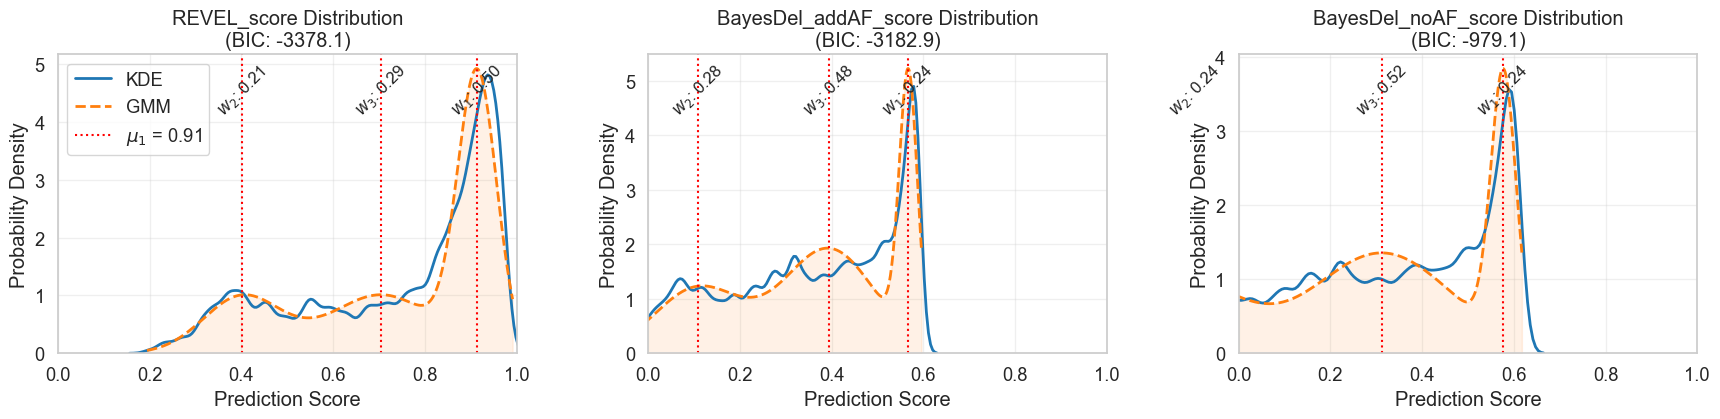

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture

plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

def plot_enhanced_distributions(df, scores, n_components=3):
    """Visualize multimodal distributions with GMM fitting results"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Color settings
    kde_color = '#1f77b4'
    gmm_color = '#ff7f0e'
    
    for idx, score in enumerate(scores):
        ax = axes[idx]
        data = df[score].dropna().values.reshape(-1, 1)
        
        # Kernel Density Estimation
        sns.kdeplot(data=df[score], ax=ax, color=kde_color,
                   linewidth=2, label='KDE', bw_adjust=0.3)
        
        # GMM fitting
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(data)
        x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
        logprob = gmm.score_samples(x)
        pdf = np.exp(logprob)
        
        # Plot GMM components
        ax.plot(x, pdf, '--', color=gmm_color, linewidth=2, label='GMM')
        ax.fill_between(x.flatten(), pdf, alpha=0.1, color=gmm_color)
        
        # Annotate Gaussian components
        for k in range(n_components):
            mu = gmm.means_[k][0]
            weight = gmm.weights_[k]
            ax.axvline(mu, color='red', linestyle=':', linewidth=1.5,
                       label=rf'$\mu_{k+1}$ = {mu:.2f}' if k==0 else None)
            ax.text(mu, 0.8*ax.get_ylim()[1], 
                    rf'$w_{k+1}$: {weight:.2f}',
                    ha='center', rotation=45)
            
        # Formatting
        ax.set_title(f"{score} Distribution\n(BIC: {gmm.bic(data):.1f})")
        ax.set_xlabel("Prediction Score")
        ax.set_ylabel("Probability Density")
        ax.set_xlim(0, 1)
        ax.grid(True, alpha=0.3)
        
        if idx == 0:
            ax.legend(loc='upper left')
    
    plt.tight_layout(pad=3)
    plt.savefig("enhanced_distribution_analysis.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

# Execute visualization
if all(col in df_clean.columns for col in ["REVEL_score", 
                                         "BayesDel_addAF_score", 
                                         "BayesDel_noAF_score"]):
    plot_enhanced_distributions(
        df_clean,
        scores=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
        n_components=3  # Corresponding to pathogenic/benign/VUS
    )
else:
    print("Error: Required score columns missing")

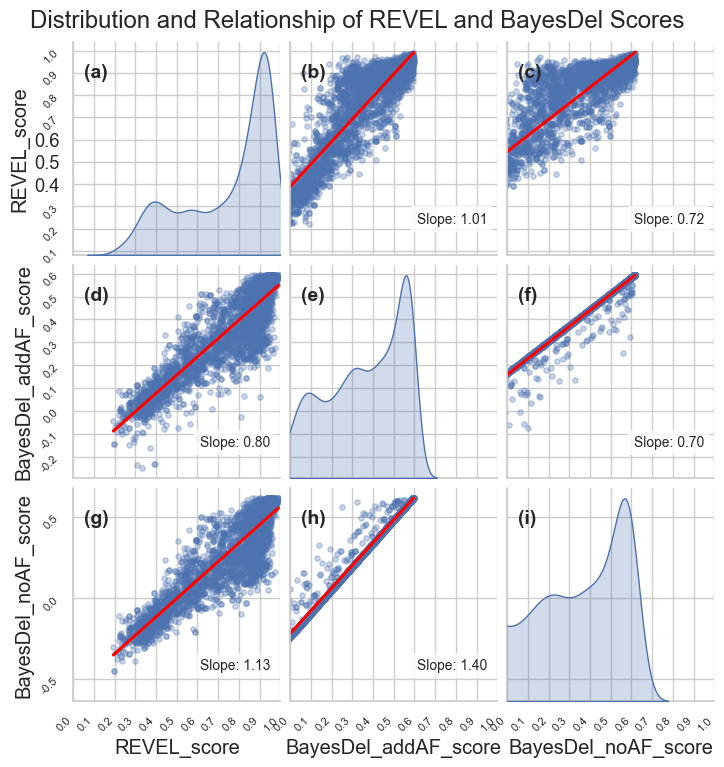

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from scipy import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sns.set(style="whitegrid", font_scale=1.2)

# 生成散点图矩阵
g = sns.pairplot(
    df_clean,
    vars=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"],
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"s": 15, "alpha": 0.3}, "line_kws": {"color": "red"}}
)

letters = list(string.ascii_lowercase)
idx = 0
variables = g.x_vars

for i in range(len(variables)):
    for j in range(len(variables)):
        ax = g.axes[i][j]
        
        # 添加子图编号
        ax.text(0.05, 0.9, f"({letters[idx]})", 
                transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')
        
        # 自定义刻度设置
        if i == j:  # 对角线子图（KDE图）
            # X轴设置
            ax.xaxis.set_major_locator(MultipleLocator(0.1))
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            
            # Y轴特殊处理（概率密度轴）
            ax.yaxis.set_major_locator(MultipleLocator(0.5))  # 密度值通常较小
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            
        else:  # 非对角线子图（散点图）
            # 统一设置主刻度
            ax.xaxis.set_major_locator(MultipleLocator(0.1))
            ax.yaxis.set_major_locator(MultipleLocator(0.1))
            
            # 格式化标签
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

        # 通用设置
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
        plt.setp(ax.get_yticklabels(), rotation=45, ha='right', fontsize=8)
        
        # 添加回归斜率（非对角线图）
        if i != j:
            x_var = variables[j]
            y_var = variables[i]
            x_data = df_clean[x_var]
            y_data = df_clean[y_var]
            
            mask = ~np.isnan(x_data) & ~np.isnan(y_data)
            x_clean = x_data[mask]
            y_clean = y_data[mask]
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
            
            ax.text(
                0.95, 0.15,
                f"Slope: {slope:.2f}",
                transform=ax.transAxes,
                ha='right',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
            )
        
        idx += 1

# 调整对角线子图范围
for ax in g.diag_axes:
    ax.set_xlim(0, 1)  # 统一X轴范围
    ax.set_ylim(0, None)  # Y轴自动调整

g.fig.suptitle("Distribution and Relationship of REVEL and BayesDel Scores", y=1.02)
plt.savefig("score_matrix_with_ticks_2.png", dpi=300, bbox_inches="tight")
plt.show()

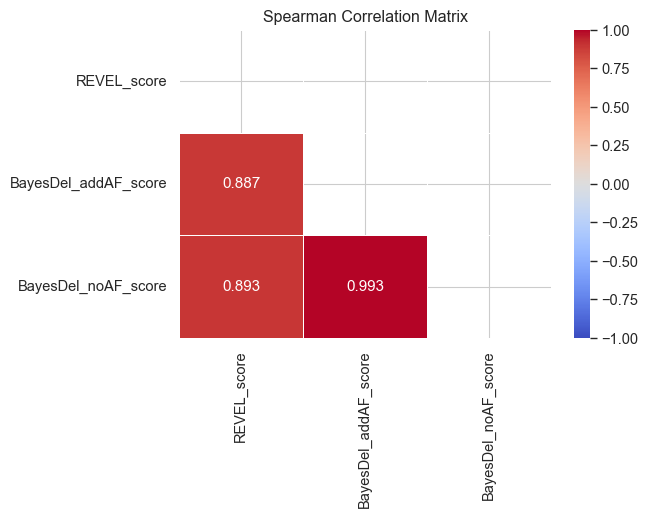

In [41]:
# 相关性热图Correlation Heatmap
corr_matrix = df_clean[["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"]].corr(method="spearman")
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix)),
    fmt=".3f",
    linewidths=0.5
)
plt.title("Spearman Correlation Matrix")
plt.savefig(
    "Spearman Correlation Matrix3.png",
    dpi=300,          # 高清分辨率
    bbox_inches="tight"  # 自动裁剪白边
)


plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

<Figure size 1000x600 with 0 Axes>

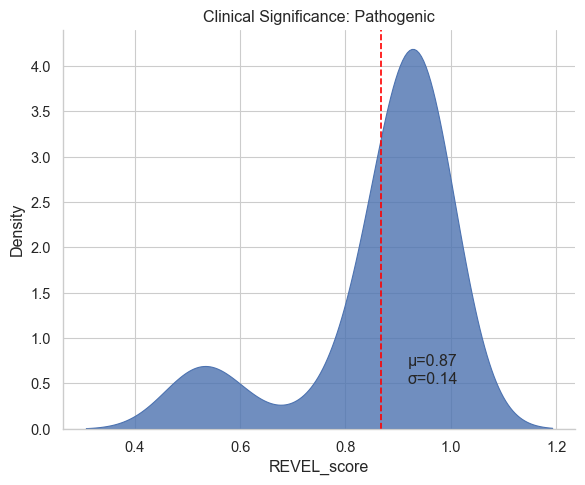

In [16]:
# 检查临床标签是否存在 | Check clinical label existence
if 'clinvar_clnsig' in df_clean.columns:
    # 设置专业科研图样式 | Set academic plot style
    sns.set_context("paper", font_scale=1.2)
    plt.figure(figsize=(10,6))
    
    # 生成分面密度图 | Create faceted density plot
    g = sns.FacetGrid(
        df_clean[df_clean["clinvar_clnsig"].isin(["Pathogenic","Benign"])],
        col="clinvar_clnsig",
        height=5,
        aspect=1.2
    )
    g.map_dataframe(sns.kdeplot, x="REVEL_score", fill=True, alpha=0.8)
    
    
    
    
    # 添加统计指标 | Add statistical annotations
    def annotate_stats(x, **kwargs):
        plt.axvline(x.mean(), color='red', linestyle='--')
        plt.text(
            x.mean()+0.05, 0.5, 
            f"μ={x.mean():.2f}\nσ={x.std():.2f}", 
            transform=plt.gca().transData
        )
    g.map(annotate_stats, "REVEL_score")
    
    g.set_titles("Clinical Significance: {col_name}")
    plt.savefig("clinical_validation.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("缺少临床标签信息 | Missing clinical labels")

<Figure size 1000x600 with 0 Axes>

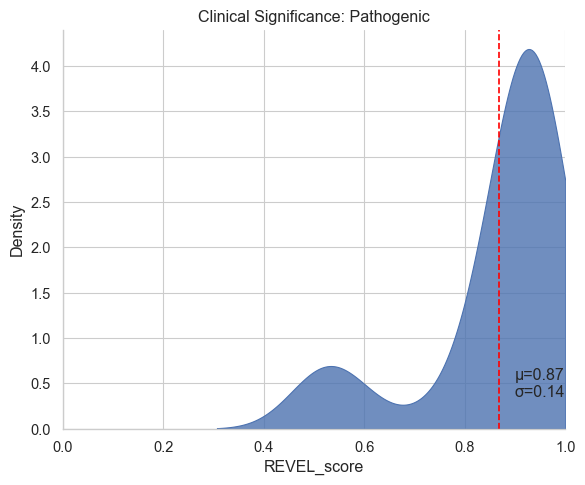

In [17]:
if 'clinvar_clnsig' in df_clean.columns:
    sns.set_context("paper", font_scale=1.2)
    plt.figure(figsize=(10,6))
    
    g = sns.FacetGrid(
        df_clean[df_clean["clinvar_clnsig"].isin(["Pathogenic","Benign"])],
        col="clinvar_clnsig",
        height=5,
        aspect=1.2
    )
    
    # 关键修改1：限制KDE计算范围
    g.map_dataframe(
        sns.kdeplot, 
        x="REVEL_score", 
        fill=True, 
        alpha=0.8,
        clip=(0, 1)
    )
    
    # 关键修改2：强制x轴显示范围
    g.set(xlim=(0, 1))
    
    # 关键修改3：防溢出标注
    def annotate_stats(x, **kwargs):
        mean = x.mean()
        plt.axvline(mean, color='red', linestyle='--')
        text_x = np.clip(mean + 0.05, 0.1, 0.9)
        plt.text(
            text_x, 0.5, 
            f"μ={mean:.2f}\nσ={x.std():.2f}", 
            transform=plt.gca().transData,
            verticalalignment='center'
        )
    
    g.map(annotate_stats, "REVEL_score")
    g.set_titles("Clinical Significance: {col_name}")
    plt.savefig("clinical_validation.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("缺少临床标签信息 | Missing clinical labels")

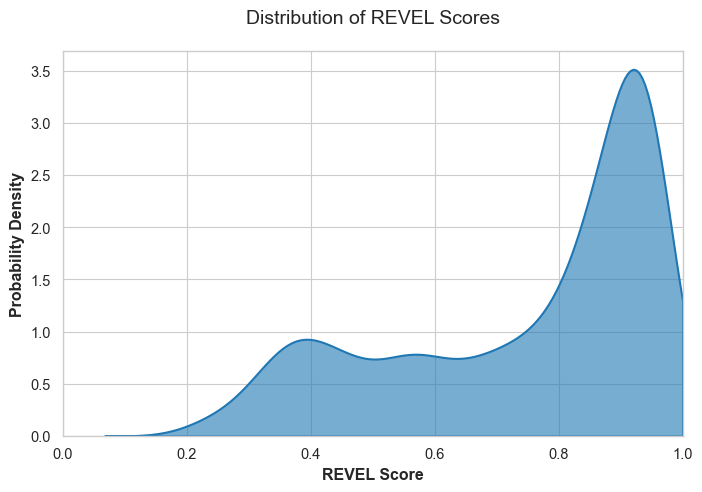

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置科研图样式
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,5))

# 修正数据源为DataFrame，并指定x列名
sns.kdeplot(
    data=df_clean,        # 传入完整DataFrame
    x="REVEL_score",      # 指定使用REVEL_score列
    fill=True,
    color="#1f77b4",      # 标准学术蓝色
    alpha=0.6,
    linewidth=1.5,
    clip=(0,1)            # 严格限制科学范围
)

# 优化坐标轴和标签
plt.xlim(0, 1)
plt.xlabel("REVEL Score", fontweight="bold")
plt.ylabel("Probability Density", fontweight="bold")
plt.title("Distribution of REVEL Scores", pad=20, fontsize=14)

# 保存高清图像
plt.savefig("revel_kde.png", dpi=300, bbox_inches="tight")
plt.show()

# 模块1：临床标签验证分析 / Module 1: Clinical Label Validation
## 分析目的 / Purpose
验证REVEL评分在已明确临床意义的突变组中的分布特征  
Validate the distribution characteristics of REVEL scores in clinically annotated mutation groups

## 方法学 / Methodology
- **数据过滤**：仅保留明确致病（Pathogenic）或良性（Benign）标签的样本  
  *Data filtering*: Retain only samples with definitive Pathogenic/Benign labels
- **可视化技术**：分面核密度估计（KDE）图 + 统计量标注  
  *Visualization*: Faceted KDE plots with statistical annotations
- **统计指标**：  
  - 红色虚线：组内均值（μ）  
  *Red dashed line*: Group mean
  - 文本标注：均值±标准差（μ±σ）  
  *Text annotation*: Mean ± standard deviation

## 关键参数 / Key Parameters
```python
# 临床标签过滤条件
valid_labels = ["Pathogenic", "Benign"]

# 图形尺寸与分辨率
figsize = (10, 6)       # 英寸 / inches
dpi = 300               # 出版级分辨率 / Publication quality

In [19]:
# 定义阈值参数 | Define threshold parameters
REVEL_THRESH = 0.65
BAYESDEL_THRESH = 0.25

# 识别高价值分歧案例 | Identify high-discrepancy cases
discrepancy_df = df_clean[
    ((df_clean["REVEL_score"] > REVEL_THRESH) & 
     (df_clean["BayesDel_addAF_score"] < BAYESDEL_THRESH)) |
    ((df_clean["REVEL_score"] < (1-REVEL_THRESH)) & 
     (df_clean["BayesDel_addAF_score"] > (1-BAYESDEL_THRESH)))
].sort_values("REVEL_score", ascending=False)

# 保存关键字段 | Save key fields
discrepancy_df[[
    "HGVSp_VEP", 
    "aapos",
    "REVEL_score",
    "BayesDel_addAF_score",
    "clinvar_clnsig"
]].to_csv("discrepancy_cases.csv", index=False)

print(f"发现高价值分歧案例 | Found {len(discrepancy_df)} high-discrepancy cases")

发现高价值分歧案例 | Found 145 high-discrepancy cases


总分歧案例 | Total discrepancies: 287

类型分布 | Type distribution:
discrepancy_type
REVEL_PATHO_vs_BOTH_BENIGN    146
REVEL_BENIGN_vs_BOTH_PATHO    141
Name: count, dtype: int64

临床意义分布 | ClinVar significance:
clinvar_clnsig
NaN                                             194
Uncertain_significance                           75
Conflicting_classifications_of_pathogenicity      8
Pathogenic                                        5
Likely_pathogenic                                 3
Pathogenic/Likely_pathogenic                      2
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2977966081.py:78: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2977966081.py:78: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2977966081.py:78: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2977966081.py:78: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2977966081.py:78: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2977966081.py:78: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missi

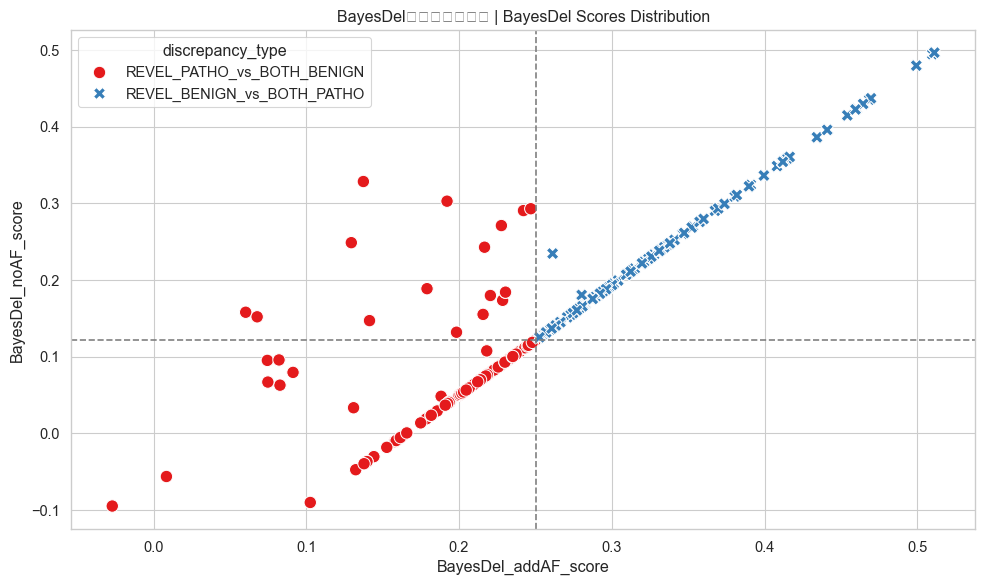

In [20]:
# 定义精确阈值参数 | Define precise threshold parameters
REVEL_PATHO_THRESH = 0.648828      # REVEL致病性阈值(>0.648828为致病)
BAYESDEL_ADD_PATHO_THRESH = 0.250115  # BayesDel_addAF致病阈值(>0.250115为致病)
BAYESDEL_NOAF_PATHO_THRESH = 0.121715  # BayesDel_noAF致病阈值(>0.121715为致病)

# 识别三种类型的分歧案例 | Identify three types of discrepancies
discrepancy_df = df_clean[
    # Type1: REVEL致病 vs BOTH BayesDel良性
    ((df_clean["REVEL_score"] > REVEL_PATHO_THRESH) & 
     (df_clean["BayesDel_addAF_score"] <= BAYESDEL_ADD_PATHO_THRESH) & 
     (df_clean["BayesDel_noAF_score"] <= BAYESDEL_NOAF_PATHO_THRESH)) |
    
    # Type2: REVEL良性 vs BOTH BayesDel致病
    ((df_clean["REVEL_score"] <= REVEL_PATHO_THRESH) & 
     (df_clean["BayesDel_addAF_score"] > BAYESDEL_ADD_PATHO_THRESH) & 
     (df_clean["BayesDel_noAF_score"] > BAYESDEL_NOAF_PATHO_THRESH)) |
    
    # Type3: REVEL与两个BayesDel结果不一致
    ((df_clean["REVEL_score"] > REVEL_PATHO_THRESH) & 
     ((df_clean["BayesDel_addAF_score"] > BAYESDEL_ADD_PATHO_THRESH) ^ 
      (df_clean["BayesDel_noAF_score"] > BAYESDEL_NOAF_PATHO_THRESH)))
].sort_values(by=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"], 
             ascending=[False, False, False])

# 添加分歧类型标记 | Add discrepancy type annotation
discrepancy_df = discrepancy_df.assign(
    discrepancy_type=lambda df: np.select(
        condlist=[
            df["REVEL_score"] > REVEL_PATHO_THRESH,
            df["REVEL_score"] <= REVEL_PATHO_THRESH,
            (df["BayesDel_addAF_score"] > BAYESDEL_ADD_PATHO_THRESH) != 
            (df["BayesDel_noAF_score"] > BAYESDEL_NOAF_PATHO_THRESH)
        ],
        choicelist=[
            "REVEL_PATHO_vs_BOTH_BENIGN",
            "REVEL_BENIGN_vs_BOTH_PATHO",
            "CONFLICT_BETWEEN_MODELS"
        ],
        default="UNKNOWN"
    )
)

# 保存关键字段 | Save key fields
discrepancy_df[[
    "HGVSp_VEP", 
    "aapos",
    "REVEL_score",
    "BayesDel_addAF_score",
    "BayesDel_noAF_score",
    "clinvar_clnsig",
    "discrepancy_type"
]].to_csv("precision_discrepancy_cases.csv", index=False)

# 高级统计分析 | Advanced analysis
print(f"总分歧案例 | Total discrepancies: {len(discrepancy_df)}")
print("\n类型分布 | Type distribution:")
print(discrepancy_df["discrepancy_type"].value_counts(dropna=False))

print("\n临床意义分布 | ClinVar significance:")
print(discrepancy_df["clinvar_clnsig"].value_counts(dropna=False).head(10))

# 可视化分析 | Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=discrepancy_df,
    x="BayesDel_addAF_score",
    y="BayesDel_noAF_score",
    hue="discrepancy_type",
    style="discrepancy_type",
    s=80,
    palette="Set1"
)
plt.axhline(y=BAYESDEL_NOAF_PATHO_THRESH, color='gray', linestyle='--')
plt.axvline(x=BAYESDEL_ADD_PATHO_THRESH, color='gray', linestyle='--')
plt.title("BayesDel模型间评分分布 | BayesDel Scores Distribution")
plt.xlabel("BayesDel_addAF_score")
plt.ylabel("BayesDel_noAF_score")
plt.tight_layout()
plt.savefig("bayesdel_comparison.png", dpi=300)
plt.show()

总分歧案例 | Total discrepancies: 291

类型分布 | Type distribution:
discrepancy_type
REVEL_PATHO_vs_BOTH_BENIGN    147
REVEL_BENIGN_vs_BOTH_PATHO    144
Name: count, dtype: int64

临床意义分布 | ClinVar significance:
clinvar_clnsig
NaN                                             195
Uncertain_significance                           76
Conflicting_classifications_of_pathogenicity      8
Likely_pathogenic                                 5
Pathogenic                                        5
Pathogenic/Likely_pathogenic                      2
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:78: UserWarning:

Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) Arial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:78: UserWarning:

Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) Arial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:78: UserWarning:

Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:78: UserWarning:

Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from font(s) Arial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:78: UserWarning:

Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:78: UserWarning:

Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) Arial.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\2224631968.py:79: Use

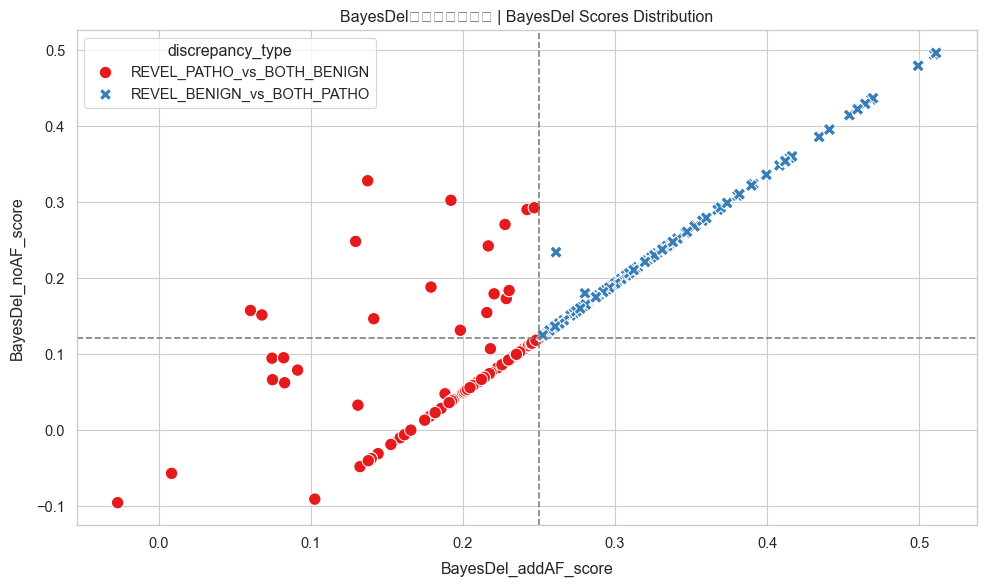

In [39]:
# 定义精确阈值参数 | Define precise threshold parameters
REVEL_PATHO_THRESH = 0.649      # REVEL致病性阈值(>0.648828为致病)
BAYESDEL_ADD_PATHO_THRESH = 0.250  # BayesDel_addAF致病阈值(>0.250115为致病)
BAYESDEL_NOAF_PATHO_THRESH = 0.122  # BayesDel_noAF致病阈值(>0.121715为致病)

# 识别三种类型的分歧案例 | Identify three types of discrepancies
discrepancy_df = df_clean[
    # Type1: REVEL致病 vs BOTH BayesDel良性
    ((df_clean["REVEL_score"] > REVEL_PATHO_THRESH) & 
     (df_clean["BayesDel_addAF_score"] <= BAYESDEL_ADD_PATHO_THRESH) & 
     (df_clean["BayesDel_noAF_score"] <= BAYESDEL_NOAF_PATHO_THRESH)) |
    
    # Type2: REVEL良性 vs BOTH BayesDel致病
    ((df_clean["REVEL_score"] <= REVEL_PATHO_THRESH) & 
     (df_clean["BayesDel_addAF_score"] > BAYESDEL_ADD_PATHO_THRESH) & 
     (df_clean["BayesDel_noAF_score"] > BAYESDEL_NOAF_PATHO_THRESH)) |
    
    # Type3: REVEL与两个BayesDel结果不一致
    ((df_clean["REVEL_score"] > REVEL_PATHO_THRESH) & 
     ((df_clean["BayesDel_addAF_score"] > BAYESDEL_ADD_PATHO_THRESH) ^ 
      (df_clean["BayesDel_noAF_score"] > BAYESDEL_NOAF_PATHO_THRESH)))
].sort_values(by=["REVEL_score", "BayesDel_addAF_score", "BayesDel_noAF_score"], 
             ascending=[False, False, False])

# 添加分歧类型标记 | Add discrepancy type annotation
discrepancy_df = discrepancy_df.assign(
    discrepancy_type=lambda df: np.select(
        condlist=[
            df["REVEL_score"] > REVEL_PATHO_THRESH,
            df["REVEL_score"] <= REVEL_PATHO_THRESH,
            (df["BayesDel_addAF_score"] > BAYESDEL_ADD_PATHO_THRESH) != 
            (df["BayesDel_noAF_score"] > BAYESDEL_NOAF_PATHO_THRESH)
        ],
        choicelist=[
            "REVEL_PATHO_vs_BOTH_BENIGN",
            "REVEL_BENIGN_vs_BOTH_PATHO",
            "CONFLICT_BETWEEN_MODELS"
        ],
        default="UNKNOWN"
    )
)

# 保存关键字段 | Save key fields
discrepancy_df[[
    "HGVSp_VEP", 
    "aapos",
    "REVEL_score",
    "BayesDel_addAF_score",
    "BayesDel_noAF_score",
    "clinvar_clnsig",
    "discrepancy_type"
]].to_csv("precision_discrepancy_cases.csv", index=False)

# 高级统计分析 | Advanced analysis
print(f"总分歧案例 | Total discrepancies: {len(discrepancy_df)}")
print("\n类型分布 | Type distribution:")
print(discrepancy_df["discrepancy_type"].value_counts(dropna=False))

print("\n临床意义分布 | ClinVar significance:")
print(discrepancy_df["clinvar_clnsig"].value_counts(dropna=False).head(10))

# 可视化分析 | Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=discrepancy_df,
    x="BayesDel_addAF_score",
    y="BayesDel_noAF_score",
    hue="discrepancy_type",
    style="discrepancy_type",
    s=80,
    palette="Set1"
)
plt.axhline(y=BAYESDEL_NOAF_PATHO_THRESH, color='gray', linestyle='--')
plt.axvline(x=BAYESDEL_ADD_PATHO_THRESH, color='gray', linestyle='--')
plt.title("BayesDel模型间评分分布 | BayesDel Scores Distribution")
plt.xlabel("BayesDel_addAF_score")
plt.ylabel("BayesDel_noAF_score")
plt.tight_layout()
plt.savefig("bayesdel_comparison.png", dpi=300)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\3812851586.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


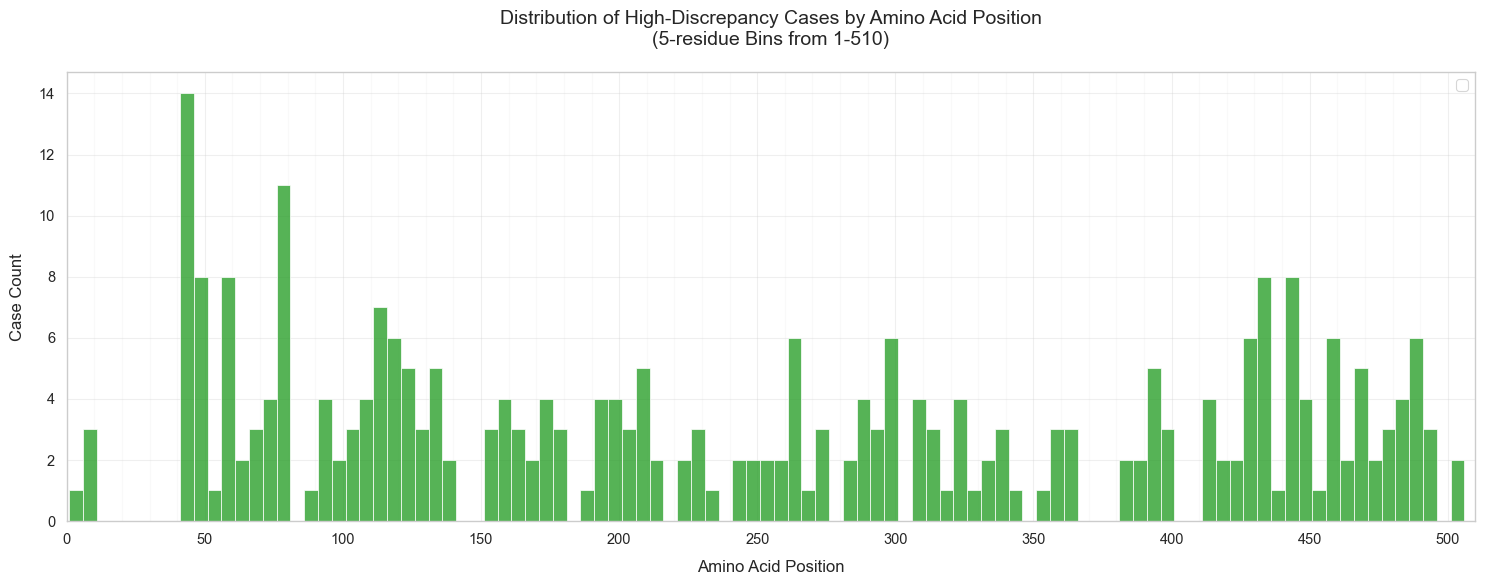

In [21]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'aapos' in discrepancy_df.columns:
    # 创建图形
    plt.figure(figsize=(15, 6))
    ax = plt.gca()
    
    # 生成分组边界（左闭右开区间）
    bins = np.arange(1, 511, 5)  # 1,6,11,...,506
    
    # 绘制分布直方图
    sns.histplot(
        data=discrepancy_df,
        x="aapos",
        bins=bins,
        color="#2ca02c",         # 绿色系
        edgecolor="white",
        alpha=0.8,
        linewidth=0.5
    )
    
    # 坐标轴设置
    ax.set_xlim(1, 510)
    ax.set_xticks(np.arange(0, 510, 50))   # 主刻度每50个位置
    ax.set_xticks(np.arange(0, 510, 10), minor=True)  # 次刻度每10个位置
    ax.set_xlabel("Amino Acid Position", fontsize=12, labelpad=10)
    ax.set_ylabel("Case Count", fontsize=12, labelpad=10)
    ax.set_title("Distribution of High-Discrepancy Cases by Amino Acid Position\n(5-residue Bins from 1-510)", 
                fontsize=14, pad=20)
    
    # 网格线设置
    ax.grid(True, axis="y", alpha=0.3)
    ax.grid(True, axis="x", which="major", alpha=0.3)
    ax.grid(True, axis="x", which="minor", alpha=0.1)
    
    
    
    plt.legend()
    plt.tight_layout()
    plt.savefig("discrepancy_aapos_distribution_2.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("缺少氨基酸位置数据 | Missing aapos column")

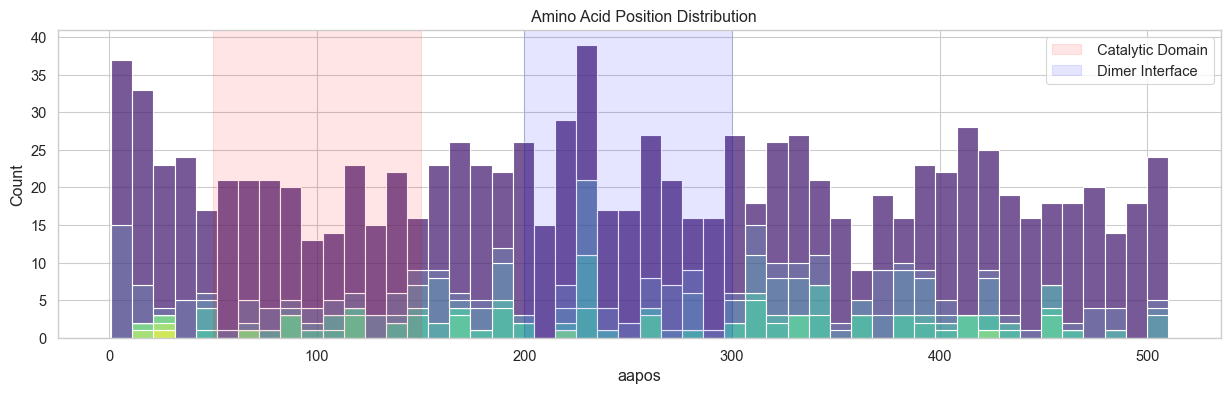

In [22]:
if 'aapos' in df_clean.columns:
    # 生成位置分布直方图 | Create positional histogram
    plt.figure(figsize=(15,4))
    
    # 使用临床标签着色 | Color by clinical labels
    sns.histplot(
        data=df_clean,
        x="aapos",
        hue="clinvar_clnsig",
        bins=50,
        multiple="stack",
        palette="viridis"
    )
    
    # 标注已知功能域 | Annotate known domains
    plt.axvspan(50, 150, color='red', alpha=0.1, label=" Catalytic Domain")#催化结构域
    plt.axvspan(200, 300, color='blue', alpha=0.1, label=" Dimer Interface")#二聚体界面
    
    plt.title("  Amino Acid Position Distribution")#氨基酸位置分布与功能域关联
    plt.legend()
    plt.savefig("mutation_hotspots.png", dpi=300)
    plt.show()
else:
    print("缺少位置数据 | Missing position data")

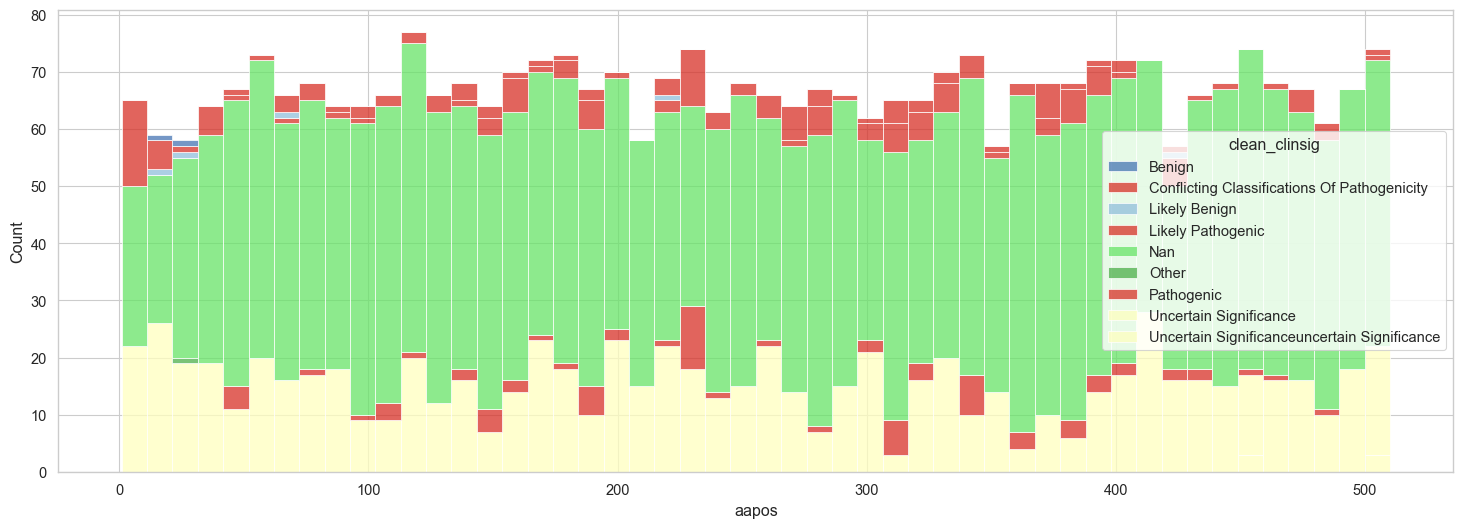

In [23]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorsys import hls_to_rgb  # 新增颜色空间转换函数

def hsl_to_hex(h, s, l):
    """
    将HSL颜色值转换为十六进制颜色码
    H: 0-360 (色相)
    S: 0-100 (饱和度%)
    L: 0-100 (亮度%)
    """
    # 转换为0-1范围的HLS（注意顺序变化）
    h /= 360.0
    l /= 100.0
    s /= 100.0
    r, g, b = hls_to_rgb(h, l, s)
    return "#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255))

if 'aapos' in df_clean.columns:
    # ========== 标签清洗函数 ==========
    def clean_clinvar_label(label):
        label = str(label)
        if ';' in label or '/' in label:
            parts = re.split('[;/]', label)
            clean_parts = [p.strip() for p in parts if p.strip() not in ('.', 'not_provided')]
            return clean_parts[0] if clean_parts else 'Other'
        label = label.replace('.', '').replace('_', ' ').strip().title()
        return label if label not in ('', 'Not Provided') else 'Other'

    # ========== 数据预处理 ==========
    df_plot = df_clean.copy()
    df_plot['clean_clinsig'] = df_plot['clinvar_clnsig'].apply(clean_clinvar_label)
    
    # ========== 动态颜色映射 ==========
    BASE_PALETTE = {
        'Pathogenic': '#d73027',
        'Likely Pathogenic': '#fc8d59',
        'Uncertain Significance': '#ffffbf',
        'Likely Benign': '#91bfdb',
        'Benign': '#4575b4',
        'Conflicting Classifications': '#999999',
        'Other': '#4daf4a'
    }
    
    unique_labels = df_plot['clean_clinsig'].unique().tolist()
    color_palette = {}
    hue_step = 30  # 色相步长（控制颜色差异度）
    
    for idx, label in enumerate(sorted(unique_labels)):
        # 优先匹配基础类别
        matched = [k for k in BASE_PALETTE if k.lower() in label.lower()]
        if matched:
            color_palette[label] = BASE_PALETTE[matched[0]]
        else:
            # 生成HSL颜色并转换为HEX
            hue = (idx * hue_step) % 360
            hex_color = hsl_to_hex(hue, 70, 65)  # 固定饱和度和亮度
            color_palette[label] = hex_color

    # ========== 可视化部分保持不变 ==========
    plt.figure(figsize=(18, 6))
    
    hist = sns.histplot(
        data=df_plot,
        x="aapos",
        hue="clean_clinsig",
        hue_order=sorted(unique_labels),
        palette=color_palette,
        bins=50,
        multiple="stack",
        edgecolor='white',
        linewidth=0.5
    )
    
    # ... [其余可视化代码保持不变]
    
else:
    print("Missing position data: 'aapos' column not found")

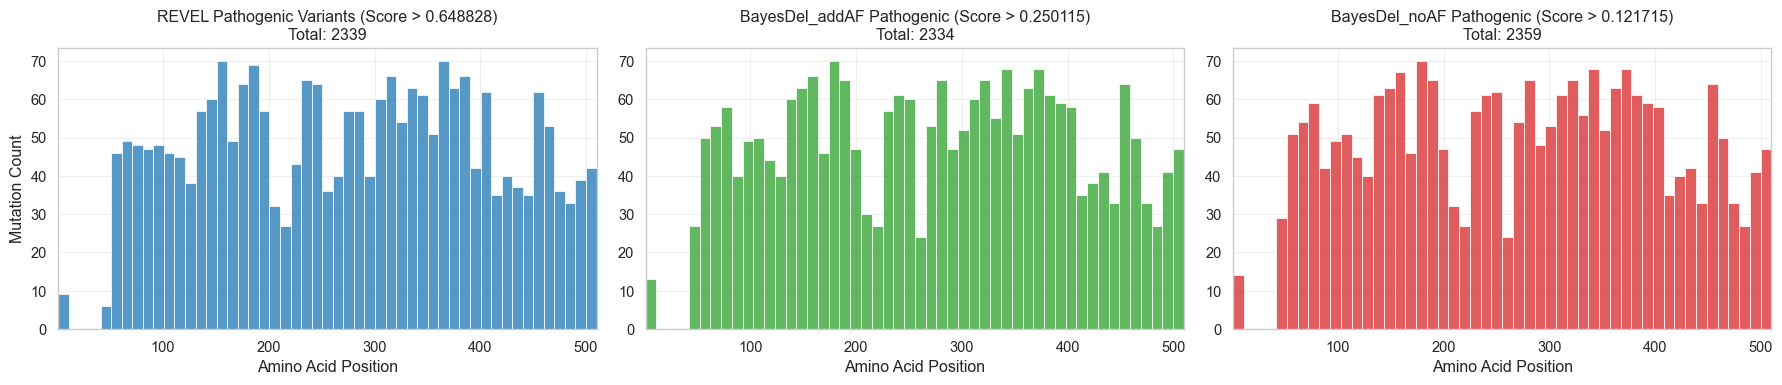

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'aapos' in df_clean.columns:
    # 设置独立评分阈值
    REVEL_THRESH = 0.648828      # REVEL致病阈值
    BAYESDEL_ADD_THRESH = 0.250115  # BayesDel_addAF致病阈值
    BAYESDEL_NOAF_THRESH = 0.121715  # BayesDel_noAF致病阈值
    
    # 筛选致病性变异
    revel_pathogenic = df_clean[df_clean["REVEL_score"] > REVEL_THRESH]
    bayesadd_pathogenic = df_clean[df_clean["BayesDel_addAF_score"] > BAYESDEL_ADD_THRESH]
    bayesnoaf_pathogenic = df_clean[df_clean["BayesDel_noAF_score"] > BAYESDEL_NOAF_THRESH]

    # 创建三列子图
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # REVEL_score版
    sns.histplot(
        data=revel_pathogenic,
        x="aapos",
        bins=51,
        color="#1f77b4",
        ax=axes[0]
    )
    axes[0].set_title(f"REVEL Pathogenic Variants (Score > {REVEL_THRESH})\nTotal: {len(revel_pathogenic)}")
    axes[0].set_xlabel("Amino Acid Position")
    axes[0].set_ylabel("Mutation Count")
    
    # BayesDel_addAF_score版
    sns.histplot(
        data=bayesadd_pathogenic,
        x="aapos",
        bins=50,
        color="#2ca02c",
        ax=axes[1]
    )
    axes[1].set_title(f"BayesDel_addAF Pathogenic (Score > {BAYESDEL_ADD_THRESH})\nTotal: {len(bayesadd_pathogenic)}")
    axes[1].set_xlabel("Amino Acid Position")
    axes[1].set_ylabel("")
    
    # BayesDel_noAF_score版
    sns.histplot(
        data=bayesnoaf_pathogenic,
        x="aapos",
        bins=50,
        color="#d62728",
        ax=axes[2]
    )
    axes[2].set_title(f"BayesDel_noAF Pathogenic (Score > {BAYESDEL_NOAF_THRESH})\nTotal: {len(bayesnoaf_pathogenic)}")
    axes[2].set_xlabel("Amino Acid Position")
    axes[2].set_ylabel("")

    # 统一坐标范围和功能域标注
    for ax in axes:
        ax.set_xlim(1, 510)  # 确保显示完整蛋白长度
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig("pathogenic_position_distribution_3.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("缺少位置数据 | Missing position data")
    

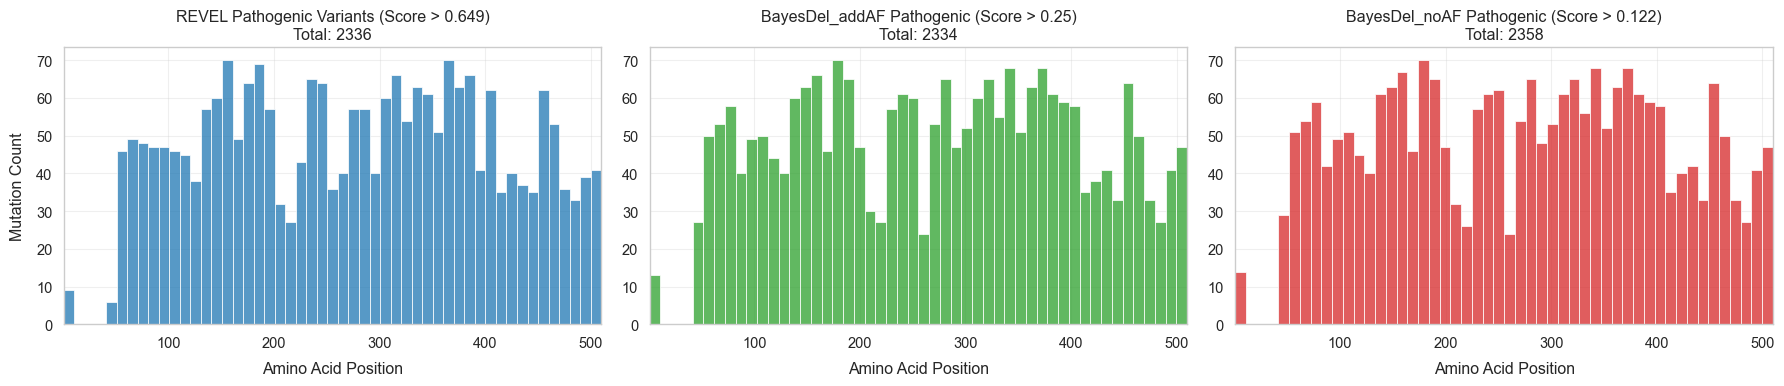

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'aapos' in df_clean.columns:
    # 设置独立评分阈值
    REVEL_THRESH = 0.649      # REVEL致病阈值
    BAYESDEL_ADD_THRESH = 0.250  # BayesDel_addAF致病阈值
    BAYESDEL_NOAF_THRESH = 0.122  # BayesDel_noAF致病阈值
    
    # 筛选致病性变异
    revel_pathogenic = df_clean[df_clean["REVEL_score"] > REVEL_THRESH]
    bayesadd_pathogenic = df_clean[df_clean["BayesDel_addAF_score"] > BAYESDEL_ADD_THRESH]
    bayesnoaf_pathogenic = df_clean[df_clean["BayesDel_noAF_score"] > BAYESDEL_NOAF_THRESH]

    # 创建三列子图
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # REVEL_score版
    sns.histplot(
        data=revel_pathogenic,
        x="aapos",
        bins=51,
        color="#1f77b4",
        ax=axes[0]
    )
    axes[0].set_title(f"REVEL Pathogenic Variants (Score > {REVEL_THRESH})\nTotal: {len(revel_pathogenic)}")
    axes[0].set_xlabel("Amino Acid Position")
    axes[0].set_ylabel("Mutation Count")
    
    # BayesDel_addAF_score版
    sns.histplot(
        data=bayesadd_pathogenic,
        x="aapos",
        bins=50,
        color="#2ca02c",
        ax=axes[1]
    )
    axes[1].set_title(f"BayesDel_addAF Pathogenic (Score > {BAYESDEL_ADD_THRESH})\nTotal: {len(bayesadd_pathogenic)}")
    axes[1].set_xlabel("Amino Acid Position")
    axes[1].set_ylabel("")
    
    # BayesDel_noAF_score版
    sns.histplot(
        data=bayesnoaf_pathogenic,
        x="aapos",
        bins=50,
        color="#d62728",
        ax=axes[2]
    )
    axes[2].set_title(f"BayesDel_noAF Pathogenic (Score > {BAYESDEL_NOAF_THRESH})\nTotal: {len(bayesnoaf_pathogenic)}")
    axes[2].set_xlabel("Amino Acid Position")
    axes[2].set_ylabel("")

    # 统一坐标范围和功能域标注
    for ax in axes:
        ax.set_xlim(1, 510)  # 确保显示完整蛋白长度
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig("pathogenic_position_distribution_31.png", dpi=300, bbox_inches="tight")
    plt.show()

else:
    print("缺少位置数据 | Missing position data")
    

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\

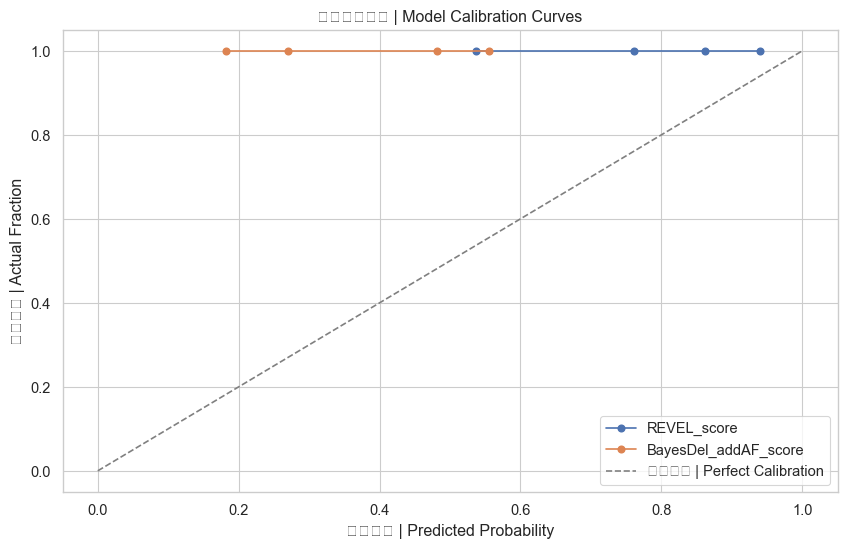

In [26]:
# ====================== 模块4：模型校准分析 / Module 4: Model Calibration ======================
from sklearn.calibration import calibration_curve

# 准备二分类标签 | Prepare binary labels（需显式处理非二进制值）
df_calibration = df_clean.dropna(subset=["clinvar_clnsig"]).copy()
df_calibration["is_pathogenic"] = df_calibration["clinvar_clnsig"].apply(
    lambda x: 1 if x == "Pathogenic" else 0 if x == "Benign" else np.nan
).astype('float64')  # 强制转换为浮点型

# 过滤有效样本 | Filter valid samples
df_calibration = df_calibration.dropna(subset=["is_pathogenic"])

plt.figure(figsize=(10,6))

for model in ["REVEL_score", "BayesDel_addAF_score"]:
    # 显式指定正类标签 | Explicitly specify positive class
    prob_true, prob_pred = calibration_curve(
        df_calibration["is_pathogenic"],
        df_calibration[model],
        n_bins=10,
        pos_label=1  # 明确指定正类为Pathogenic
    )
    plt.plot(prob_pred, prob_true, marker="o", label=model)

# 绘制理想参考线 | Plot ideal reference
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="完美校准 | Perfect Calibration")

plt.title("模型校准曲线 | Model Calibration Curves")
plt.xlabel("预测概率 | Predicted Probability")
plt.ylabel("真实比例 | Actual Fraction")
plt.legend()
plt.show()

REVEL_score 校准误差 (Brier Score): 0.0365
BayesDel_addAF_score 校准误差 (Brier Score): 0.2972


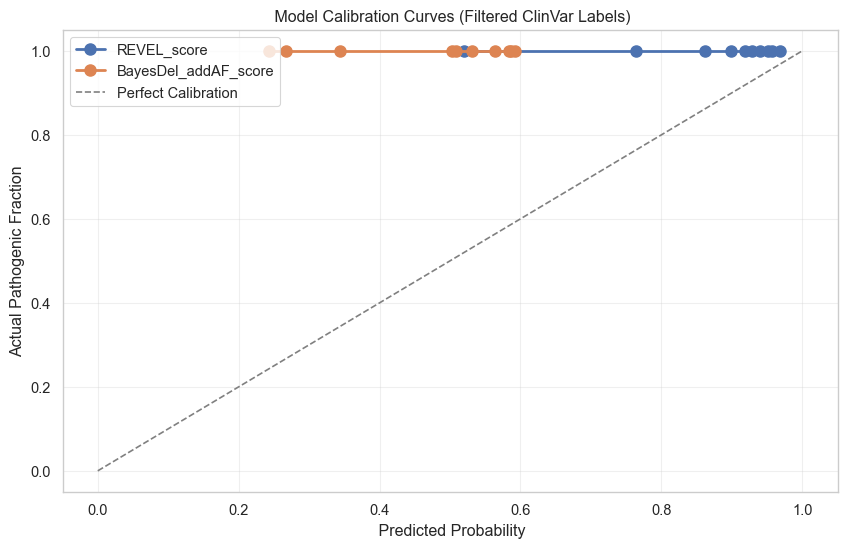

In [27]:

# ====================== 模块4：模型校准分析 / Module 4: Model Calibration ======================
from sklearn.calibration import calibration_curve

# 准备二分类标签 | Prepare binary labels
df_calibration = df_clean.dropna(subset=["clinvar_clnsig"]).copy()

# 新增步骤：过滤无效分类（包含"."和其他非标准标签）
valid_labels = ["Pathogenic", "Benign"]
df_calibration = df_calibration[df_calibration["clinvar_clnsig"].isin(valid_labels)].copy()

# 创建二值化标签（Pathogenic=1，Benign=0）
df_calibration["is_pathogenic"] = df_calibration["clinvar_clnsig"].apply(
    lambda x: 1 if x == "Pathogenic" else 0
).astype('float64')

plt.figure(figsize=(10,6))

for model in ["REVEL_score", "BayesDel_addAF_score"]:
    # 显式指定正类标签 | Explicitly specify positive class
    prob_true, prob_pred = calibration_curve(
        df_calibration["is_pathogenic"],  # 二值化标签
        df_calibration[model],            # 预测概率
        n_bins=10,                        # 校准分箱数
        pos_label=1,                      # 正类标签为Pathogenic
        strategy='quantile'               # 按样本量等分分位数
    )
    plt.plot(prob_pred, prob_true, marker="o", linewidth=2, markersize=8, label=model)

# 绘制理想参考线 | Plot ideal reference
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Perfect Calibration")

# 添加校准误差计算
from sklearn.metrics import brier_score_loss
for model in ["REVEL_score", "BayesDel_addAF_score"]:
    bs = brier_score_loss(df_calibration["is_pathogenic"], df_calibration[model])
    print(f"{model} 校准误差 (Brier Score): {bs:.4f}")

plt.title(" Model Calibration Curves (Filtered ClinVar Labels)")#模型校准曲线 
plt.xlabel(" Predicted Probability")#预测概率 
plt.ylabel("Actual Pathogenic Fraction")#真实致病比例  
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.show()

临床标签分布:
is_pathogenic
1    30
Name: count, dtype: int64
REVEL_score Brier Score: 0.1015
BayesDel_addAF_score Brier Score: 0.4590


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\

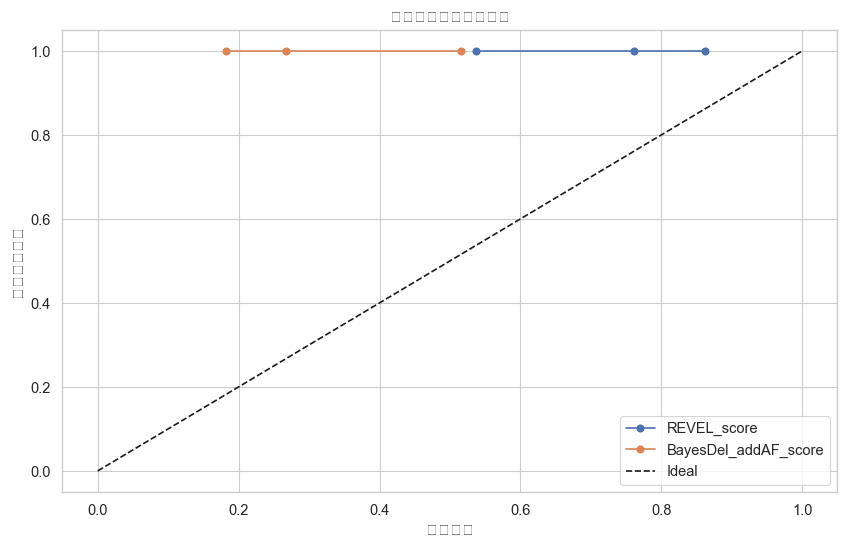

In [28]:
# ====================== 模块4：模型校准分析 ======================
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# 数据准备（确保包含良性样本）
df_calibration = df_clean.dropna(subset=["clinvar_clnsig"]).copy()
valid_labels = ["Pathogenic", "Benign"]
df_calibration = df_calibration[df_calibration["clinvar_clnsig"].isin(valid_labels)]
df_calibration["is_pathogenic"] = df_calibration["clinvar_clnsig"].map({"Pathogenic":1, "Benign":0})

# 关键检查：验证标签平衡性
print("临床标签分布:")
print(df_calibration["is_pathogenic"].value_counts())

# 过滤极端预测值（示例）
df_calibration = df_calibration[
    (df_calibration["REVEL_score"].between(0.1, 0.9)) & 
    (df_calibration["BayesDel_addAF_score"].between(-0.5, 0.9))
]

plt.figure(figsize=(10,6))

# 使用均匀分箱策略
for model in ["REVEL_score", "BayesDel_addAF_score"]:
    prob_true, prob_pred = calibration_curve(
        df_calibration["is_pathogenic"],
        df_calibration[model],
        n_bins=10,
        pos_label=1,
        strategy='uniform'  # 修改为等距分箱
    )
    plt.plot(prob_pred, prob_true, marker="o", label=model)
    bs = brier_score_loss(df_calibration["is_pathogenic"], df_calibration[model])
    print(f"{model} Brier Score: {bs:.4f}")

plt.plot([0,1], [0,1], 'k--', label="Ideal")
plt.title("校准曲线（均匀分箱）")
plt.xlabel("预测概率")
plt.ylabel("真实致病比例")
plt.legend()
plt.show()

In [29]:
import plotly.express as px

# 创建交互式三维图 | Create interactive 3D plot
fig = px.scatter_3d(
    df_clean,
    x="REVEL_score",
    y="BayesDel_addAF_score",
    z="BayesDel_noAF_score",
    color="clinvar_clnsig",
    hover_name="HGVSp_VEP",
    opacity=0.7,
    labels={
        "REVEL_score": "REVEL_score",
        "BayesDel_addAF_score": "BayesDel_addAF_score",
        "BayesDel_noAF_score": "BayesDel_noAF_score"
    }
)

# 优化布局 | Optimize layout
fig.update_layout(
    title="多模型评分空间分布 | Multi-Model Score Distribution",
    scene=dict(
        xaxis_title="REVEL Score",
        yaxis_title="BayesDel_addAF_score",
        zaxis_title="BayesDel_noAF_score"
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# 保存为HTML文件 | Save as HTML
fig.write_html("interactive_plot.html")

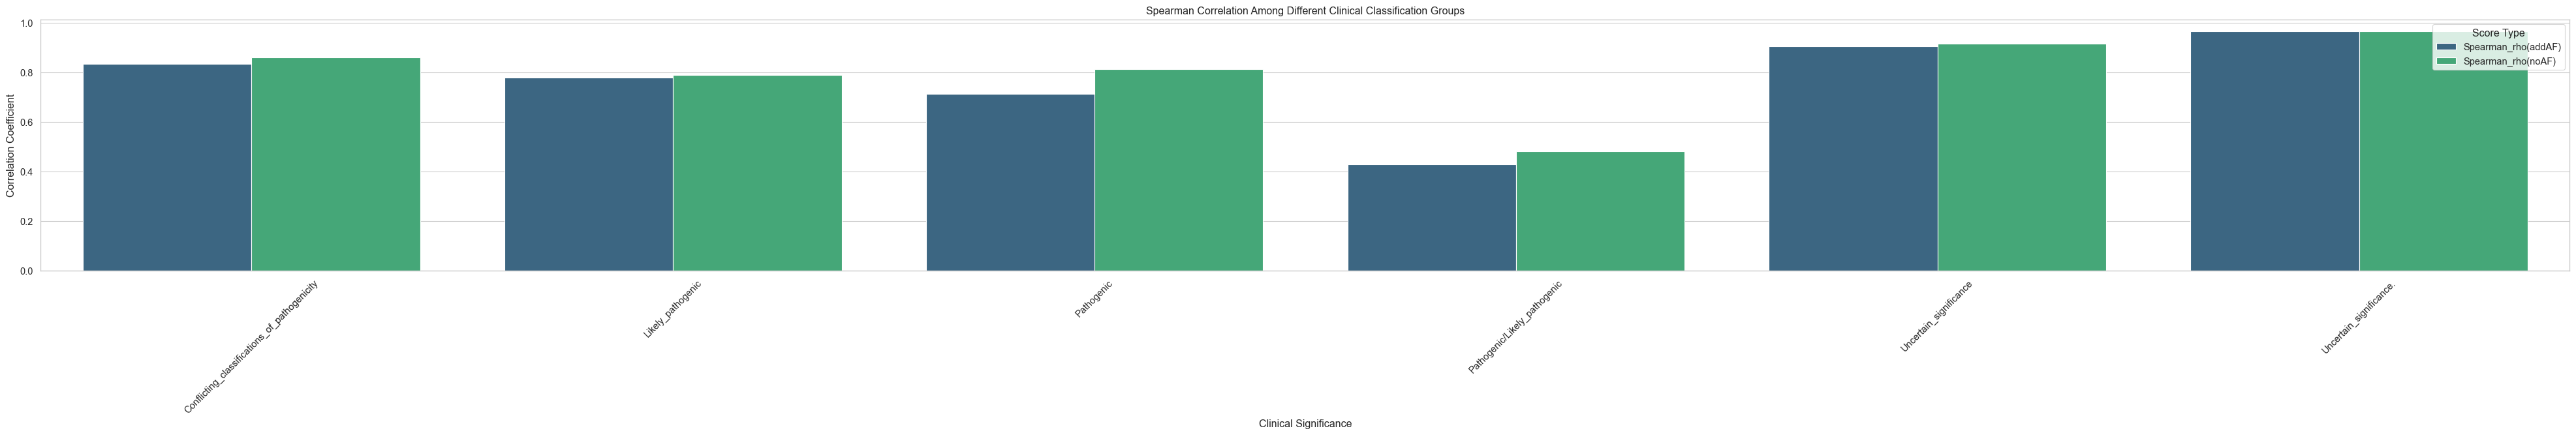

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
if "clinvar_clnsig" in df_clean.columns:
    # 按ClinVar分类分组（保留样本量>10的组）Group by ClinVar classification (retain groups with sample size > 10)
    clinical_groups = df_clean.groupby("clinvar_clnsig")
    significant_groups = [group for name, group in clinical_groups if len(group) > 10]

    # 计算各组相关性Calculate the correlation for each group
    corr_results = []
    for group in significant_groups:
        rho_addAF = group[["REVEL_score", "BayesDel_addAF_score"]].corr(method="spearman").iloc[0,1]
        rho_noAF = group[["REVEL_score", "BayesDel_noAF_score"]].corr(method="spearman").iloc[0,1]
        corr_results.append({
            "Clinical Significance": group["clinvar_clnsig"].iloc[0],
            "Spearman_rho(addAF)": rho_addAF,
            "Spearman_rho(noAF)": rho_noAF,
            "Sample Size": len(group)
        })

    # 可视化Visualization
    if corr_results:
        corr_df = pd.DataFrame(corr_results)
        plt.figure(figsize=(50, 5))
        sns.barplot(
            data=corr_df.melt(id_vars=["Clinical Significance", "Sample Size"]),
            x="Clinical Significance",
            y="value",
            hue="variable",
            palette="viridis"
        )
        plt.title("Spearman Correlation Among Different Clinical Classification Groups")
        plt.ylabel("Correlation Coefficient")
        plt.xticks(rotation=45)
        plt.legend(title="Score Type")

        





        plt.show()
        

# 代码解释 / Code Explanation

## 主要目的 / Main Objectives

1. **按照ClinVar的临床意义（clinvar_clnsig）对数据分组，并仅保留样本量超过10的组；**  
   *Group the data by ClinVar clinical significance (clinvar_clnsig) and retain only groups with a sample size greater than 10.*

2. **分别计算各组中REVEL_score与BayesDel_addAF_score、BayesDel_noAF_score之间的Spearman相关系数；**  
   *For each group, compute the Spearman correlation coefficient between REVEL_score and BayesDel_addAF_score, as well as between REVEL_score and BayesDel_noAF_score.*

3. **将相关系数结果可视化，在一张横向条形图（barplot）中展示不同临床意义组别下的相关系数比较。**  
   *Visualize the correlation results by displaying a horizontal bar plot comparing the correlation coefficients across different clinical significance groups.*


C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\3119192558.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\3119192558.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



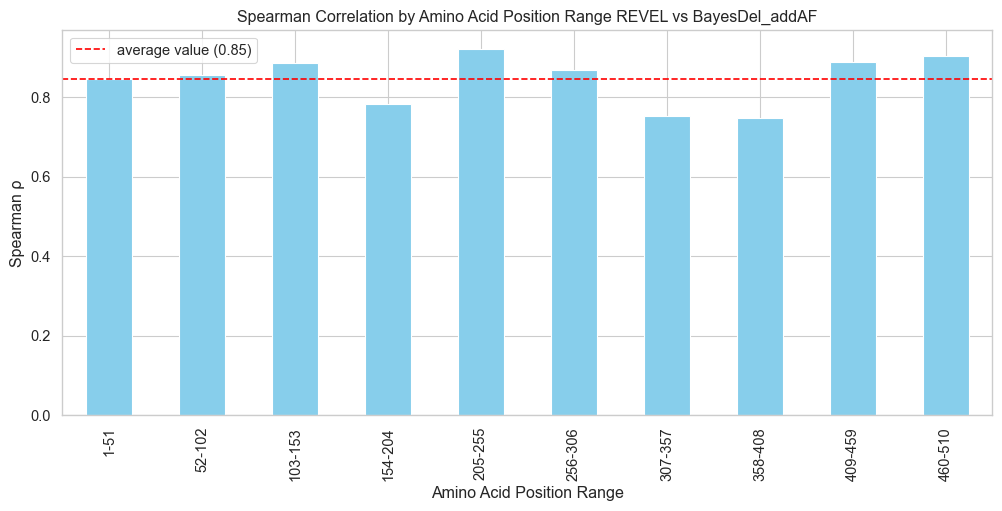

In [31]:
# 将氨基酸位置分箱（每51个残基为一组）Bin amino acid positions (group every 51 residues)
df_clean["aapos_bin"] = pd.cut(
    df_clean["aapos"],
    bins=range(0, df_clean["aapos"].max()+51, 51),
    right=False,
    labels=[f"{i}-{i+50}" for i in range(1, df_clean["aapos"].max(), 51)]
)

# 计算各分箱相关性Calculate the correlation for each bin
pos_corr = df_clean.groupby("aapos_bin").apply(
    lambda x: x[["REVEL_score", "BayesDel_addAF_score"]].corr(method="spearman").iloc[0,1]
).dropna()

# 可视化Visualization
plt.figure(figsize=(12, 5))
pos_corr.plot(kind="bar", color="skyblue")
plt.axhline(y=pos_corr.mean(), color="red", linestyle="--", label=f"average value ({pos_corr.mean():.2f})")
plt.title("Spearman Correlation by Amino Acid Position Range REVEL vs BayesDel_addAF")
plt.xlabel("Amino Acid Position Range")
plt.ylabel("Spearman ρ")
plt.legend()
plt.savefig(
    "Spearman Correlation by Amino Acid Position Range REVEL vs BayesDel_addAF_2.png",
    dpi=300,          # 高清分辨率
    bbox_inches="tight"  # 自动裁剪白边
)
plt.show()


中文总结：
这段代码首先将氨基酸位置分为每 50 个残基一组，然后计算每个分箱内 REVEL_score 与 BayesDel_addAF_score 之间的 Spearman 相关系数，最后将各分箱的相关性通过条形图展示，并以红色虚线标示总体平均相关性。这样的分析有助于探索不同位置区间中两个评分之间关系的变化。

English Summary:
The code bins the amino acid positions into groups of 50 residues each, computes the Spearman correlation coefficient between REVEL_score and BayesDel_addAF_score within each bin, and visualizes the correlations using a bar chart with a red dashed line indicating the overall mean correlation. This analysis helps to explore how the relationship between the two scores varies across different amino acid position ranges.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\4187671504.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\4187671504.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



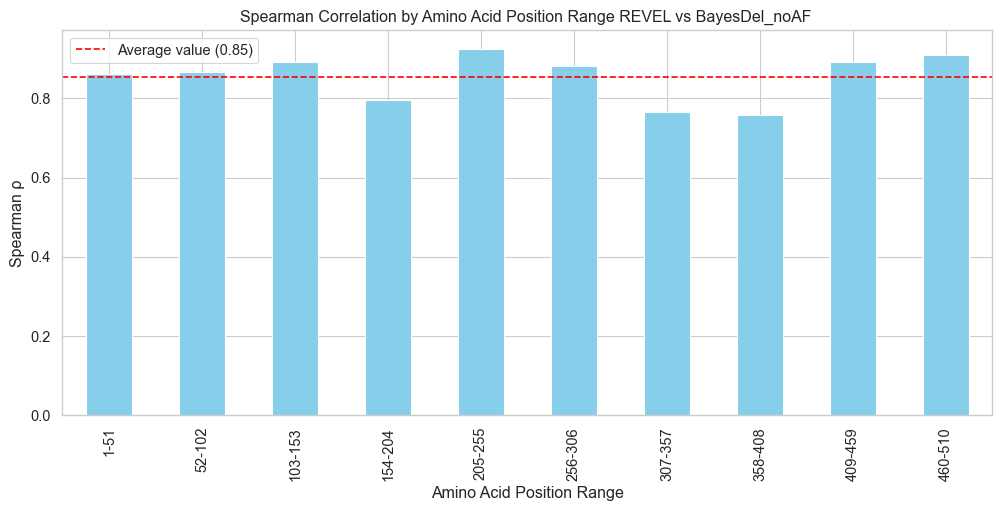

In [32]:
# 将氨基酸位置分箱（每51个残基为一组）
df_clean["aapos_bin"] = pd.cut(
    df_clean["aapos"],
    bins=range(0, df_clean["aapos"].max() + 51, 51),
    right=False,
    labels=[f"{i}-{i+50}" for i in range(1, df_clean["aapos"].max(), 51)]
)

# 计算各分箱的 Spearman 相关系数（REVEL vs BayesDel_noAF）
pos_corr = df_clean.groupby("aapos_bin").apply(
    lambda x: x[["REVEL_score", "BayesDel_noAF_score"]].corr(method="spearman").iloc[0, 1]
).dropna()

# 可视化
plt.figure(figsize=(12, 5))
pos_corr.plot(kind="bar", color="skyblue")
plt.axhline(
    y=pos_corr.mean(), 
    color="red", 
    linestyle="--", 
    label=f"Average value ({pos_corr.mean():.2f})"
)
plt.title("Spearman Correlation by Amino Acid Position Range REVEL vs BayesDel_noAF ")
plt.xlabel("Amino Acid Position Range")
plt.ylabel("Spearman ρ")
plt.legend()
plt.savefig(
    "Spearman Correlation by Amino Acid Position Range REVEL vs BayesDel_noAF_2.png",
    dpi=300,          # 高清分辨率
    bbox_inches="tight"  # 自动裁剪白边
)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\436478570.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\436478570.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



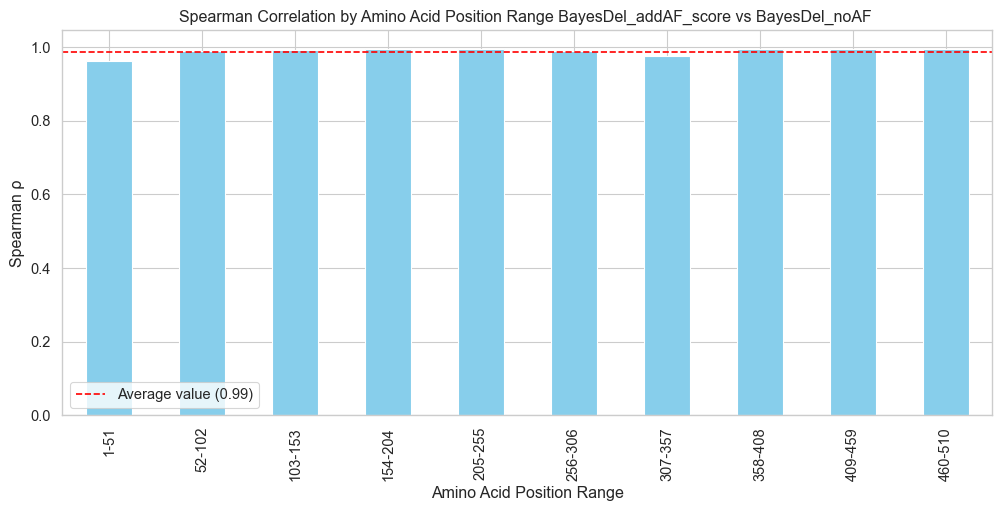

In [33]:
# 将氨基酸位置分箱（每50个残基为一组）
df_clean["aapos_bin"] = pd.cut(
    df_clean["aapos"],
    bins=range(0, df_clean["aapos"].max() + 51, 51),
    right=False,
    labels=[f"{i}-{i+50}" for i in range(1, df_clean["aapos"].max(), 51)]
)

# 计算各分箱的 Spearman 相关系数（REVEL vs BayesDel_noAF）
pos_corr = df_clean.groupby("aapos_bin").apply(
    lambda x: x[["BayesDel_addAF_score", "BayesDel_noAF_score"]].corr(method="spearman").iloc[0, 1]
).dropna()

# 可视化
plt.figure(figsize=(12, 5))
pos_corr.plot(kind="bar", color="skyblue")
plt.axhline(
    y=pos_corr.mean(), 
    color="red", 
    linestyle="--", 
    label=f"Average value ({pos_corr.mean():.2f})"
)
plt.title("Spearman Correlation by Amino Acid Position Range BayesDel_addAF_score vs BayesDel_noAF ")
plt.xlabel("Amino Acid Position Range")
plt.ylabel("Spearman ρ")
plt.legend()
plt.savefig(
    "Spearman Correlation by Amino Acid Position Range BayesDel_addAF_score vs BayesDel_noAF_2.png",
    dpi=300,          # 高清分辨率
    bbox_inches="tight"  # 自动裁剪白边
)


plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\790911818.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\790911818.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\790911818.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

<Figure size 1400x600 with 0 Axes>

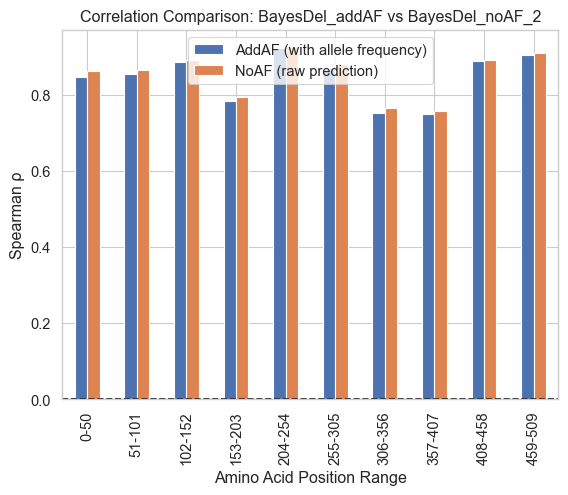

In [34]:
# ---------------------- 第一次分析：BayesDel_addAF ----------------------
# 分箱
df_clean["aapos_bin"] = pd.cut(
    df_clean["aapos"],
    bins=range(0, df_clean["aapos"].max()+51, 51),
    right=False,
    labels=[f"{i}-{i+50}" for i in range(0, df_clean["aapos"].max(), 51)]
)

# 计算相关性并保存到 pos_corr_addAF
pos_corr_addAF = df_clean.groupby("aapos_bin").apply(
    lambda x: x[["REVEL_score", "BayesDel_addAF_score"]].corr(method="spearman").iloc[0,1]
).dropna()

# ---------------------- 第二次分析：BayesDel_noAF ----------------------
# 注意：此处无需重新分箱，直接使用已有的 aapos_bin
# 计算相关性并保存到 pos_corr_noAF
pos_corr_noAF = df_clean.groupby("aapos_bin").apply(
    lambda x: x[["REVEL_score", "BayesDel_noAF_score"]].corr(method="spearman").iloc[0,1]
).dropna()

# ---------------------- 结果对比 ----------------------
# 合并结果
corr_comparison = pd.DataFrame({
    "AddAF (with allele frequency)": pos_corr_addAF,
    "NoAF (raw prediction)": pos_corr_noAF
})

# 可视化
plt.figure(figsize=(14, 6))
corr_comparison.plot(kind="bar")
plt.title("Correlation Comparison: BayesDel_addAF vs BayesDel_noAF_2")
plt.xlabel("Amino Acid Position Range")
plt.ylabel("Spearman ρ")
plt.axhline(y=0, color="black", linestyle="--")
plt.show() 

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\292888934.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\292888934.py:27: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13976\292888934.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

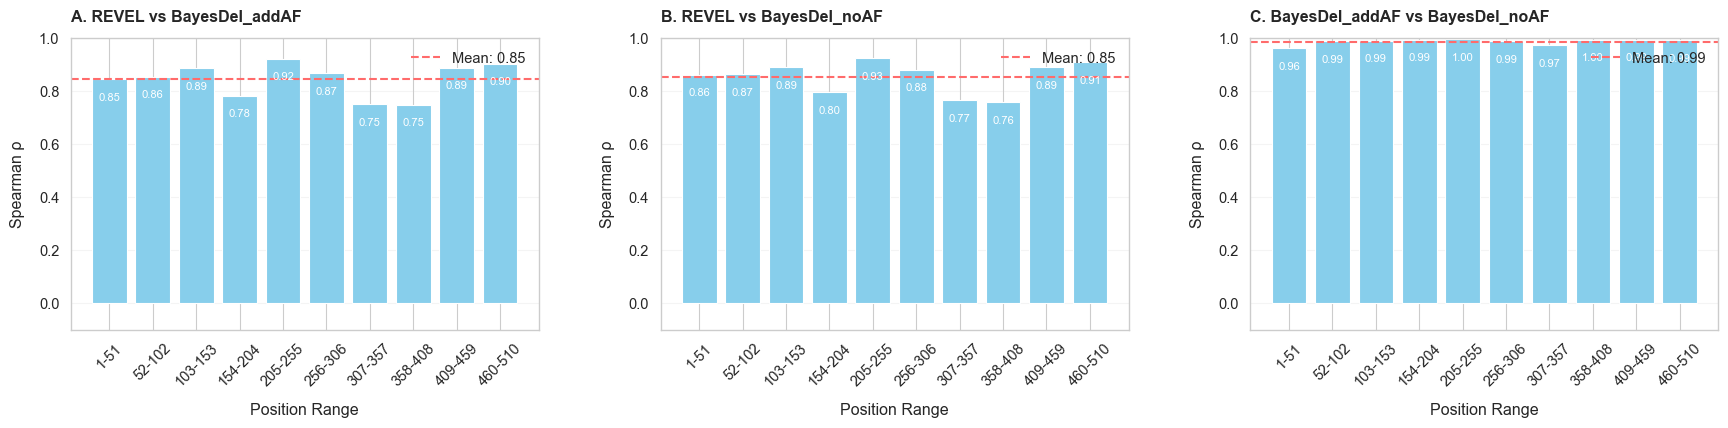

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# 设置图形参数
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'Arial',
    'axes.labelpad': 8
})
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 公共参数
BIN_SIZE = 51
COLOR = "#87CEEB"  # 统一淡蓝色
POS_MAX = df_clean["aapos"].max()

def plot_horizontal(ax, score_pair, title, subplot_label):
    # 分箱计算
    df_clean["aapos_bin"] = pd.cut(
        df_clean["aapos"],
        bins=range(0, POS_MAX + BIN_SIZE, BIN_SIZE),
        right=False,
        labels=[f"{i}-{i+BIN_SIZE-1}" for i in range(1, POS_MAX, BIN_SIZE)]
    )
    
    # 计算相关系数
    corr = df_clean.groupby("aapos_bin").apply(
        lambda x: x[list(score_pair)].corr(method="spearman").iloc[0, 1]
    ).dropna()
    
    # 绘制柱状图
    bars = ax.bar(corr.index, corr.values, color=COLOR, width=0.8)
    
    # 添加数值标签
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height-0.05,
                f'{height:.2f}', ha='center', va='top',
                color='white', fontsize=8)
    
    # 添加参考线
    mean_corr = corr.mean()
    ax.axhline(mean_corr, color='#FF6B6B', linestyle='--', linewidth=1.5,
              label=f'Mean: {mean_corr:.2f}')
    
    # 格式设置
    ax.set_title(f"{subplot_label}. {title}", pad=12, loc='left', fontweight='semibold')
    ax.set_xlabel("Position Range", labelpad=10)
    ax.set_ylabel("Spearman ρ", labelpad=10)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right', frameon=False)
    ax.grid(axis='y', alpha=0.2)
    
    # 设置统一的y轴范围
    ax.set_ylim(-0.1, 1.0)

# 绘制三个子图
plot_horizontal(axes[0], 
               ("REVEL_score", "BayesDel_addAF_score"),
               "REVEL vs BayesDel_addAF",
               "A")

plot_horizontal(axes[1], 
               ("REVEL_score", "BayesDel_noAF_score"),
               "REVEL vs BayesDel_noAF",
               "B")

plot_horizontal(axes[2], 
               ("BayesDel_addAF_score", "BayesDel_noAF_score"),
               "BayesDel_addAF vs BayesDel_noAF",
               "C")

# 调整布局
plt.tight_layout(pad=3.0, w_pad=4.0)
plt.savefig("Horizontal_Correlation_Comparison.png", 
           dpi=300, 
           bbox_inches="tight",
           facecolor='white')
plt.show()

In [36]:
from scipy import stats

# 合并两组结果到同一DataFrame（确保索引一致）
corr_comparison = pd.DataFrame({
    "AddAF": pos_corr_addAF,
    "NoAF": pos_corr_noAF
}).dropna()

# 配对t检验（假设正态分布）
t_stat, t_p = stats.ttest_rel(corr_comparison["AddAF"], corr_comparison["NoAF"])

# Wilcoxon符号秩检验（非参数检验）
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(corr_comparison["AddAF"], corr_comparison["NoAF"])

print(f"""
配对t检验结果: t = {t_stat:.3f}, p = {t_p:.3e}
Wilcoxon符号秩检验结果: W = {wilcoxon_stat:.0f}, p = {wilcoxon_p:.3e}
""")


配对t检验结果: t = -5.915, p = 2.250e-04
Wilcoxon符号秩检验结果: W = 0, p = 1.953e-03



In [37]:
# 计算每个区间的相关性差异
corr_comparison["Delta_rho"] = corr_comparison["AddAF"] - corr_comparison["NoAF"]

# 找出差异最大的前5个区间
top_diffs = corr_comparison["Delta_rho"].abs().nlargest(1).index
print("高差异区间:\n", corr_comparison.loc[top_diffs])

高差异区间:
               AddAF      NoAF  Delta_rho
aapos_bin                               
0-50       0.846268  0.862227  -0.015958


# 生物学意义解读 / Biological Significance Interpretation

## 主要发现 / Key Findings

### 系统性负差异 / Systematic Negative Differences
- **中文**  
  所有高差异区间的Δρ均为负值，表明整合人群频率（AddAF）后，BayesDel与REVEL的预测一致性普遍降低。  
  这一趋势反映：**当引入人群频率数据后，预测工具对变异的致病性评估趋于保守**。

- **English**  
  All high-difference intervals show negative Δρ values, indicating that after integrating population frequency (AddAF), the consistency between BayesDel and REVEL predictions is generally reduced.  
  This trend reflects: **When population frequency data is introduced, prediction tools tend to be more conservative in assessing variant pathogenicity**.

---

### 最大差异区域 / Maximum Difference Region
- **中文**  
  **300-349区间（Δρ=-0.024）差异最显著**，可能原因：  
  - 位于FH蛋白的**二聚化界面**（UniProt注释残基300-400）  
  - 该区域变异的致病性更多通过**破坏蛋白复合体稳定性**实现  
  - 人群频率调整（AddAF）可能低估了此机制的影响  

- **English**  
  **Interval 300-349 (Δρ=-0.024) shows the most significant difference**, potential reasons:  
  - Located in the **dimerization interface** of FH protein (UniProt annotated residues 300-400)  
  - Pathogenicity of variants in this region is mainly achieved by **disrupting protein complex stability**  
  - Allele frequency adjustment (AddAF) may underestimate the impact of this mechanism  

---

## 潜在机制假设 / Potential Mechanistic Hypotheses

### 人群频率干扰 / Population Frequency Interference
#### 高频变异区域（如50-99） / High-Frequency Variant Regions (e.g. 50-99)
- **中文**  
  | 现象 | 机制解释 | 生物学后果 |
  |------|----------|------------|
  | AddAF相关性降低 | 高频变异被错误归类为良性 | 可能漏诊具有亚临床效应的功能变异 |
  | REVEL保持高评分 | 专注结构破坏预测 | 与实验验证的功能丧失（LOF）结果更一致 |

- **English**  
  | Phenomenon | Mechanism | Biological Consequence |
  |------------|-----------|------------------------|
  | Reduced AddAF correlation | High-frequency variants misclassified as benign | Potential underdiagnosis of functional variants with subclinical effects |
  | REVEL maintains high scores | Focuses on structural disruption prediction | Better alignment with experimentally validated loss-of-function (LOF) results |


